## Importing Python Modules and Dataset

In [1]:
import os
from MakeDataset import *
import matplotlib.pyplot as plt

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


### Displaying Dataset Size and Values

In [2]:
print("Training data shape: ",X_train.shape)
print("Training label shape: ",y_train.shape)
print("Testing data shape: ",X_test.shape)
print("Testing label shape: ",y_test.shape)
print("Validation data shape: ",X_val.shape)
print("Validation label shape: ",y_val.shape)

Training data shape:  (108, 500, 3)
Training label shape:  (108,)
Testing data shape:  (36, 500, 3)
Testing label shape:  (36,)
Validation data shape:  (36, 500, 3)
Validation label shape:  (36,)


In [3]:
for i in y_test:
    print(list(classes.keys())[i-1])
    # print(i)

WALKING_DOWNSTAIRS
WALKING_DOWNSTAIRS
LAYING
WALKING_UPSTAIRS
LAYING
STANDING
LAYING
WALKING
WALKING
WALKING_DOWNSTAIRS
STANDING
LAYING
WALKING
STANDING
WALKING_DOWNSTAIRS
SITTING
STANDING
STANDING
WALKING
LAYING
SITTING
WALKING
WALKING_UPSTAIRS
STANDING
WALKING_UPSTAIRS
WALKING
WALKING_DOWNSTAIRS
LAYING
WALKING_DOWNSTAIRS
SITTING
SITTING
SITTING
SITTING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS


## Plotting Dataset Waveforms

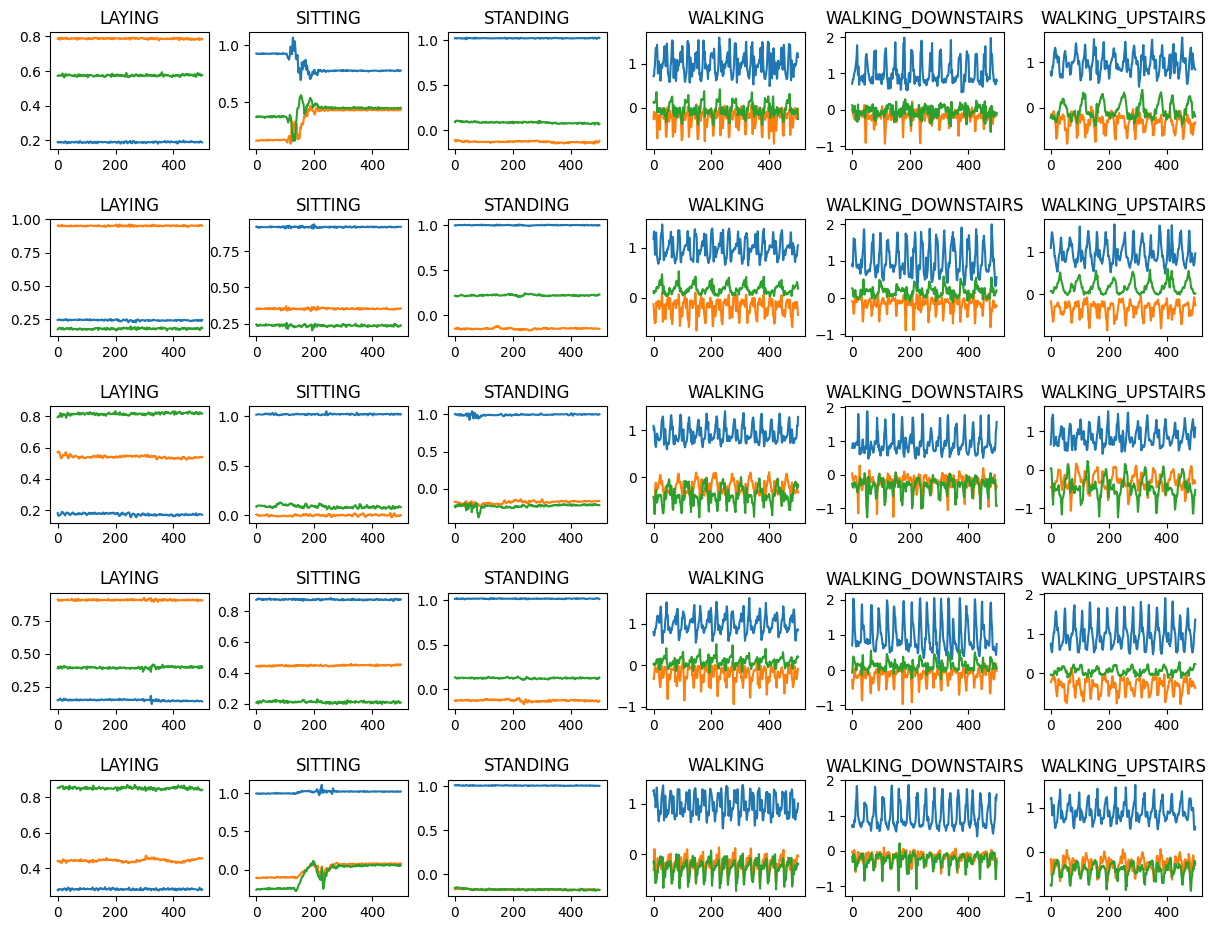

In [4]:
dataset_dir = os.path.join(combined_dir,"Train")

figure, axis = plt.subplots(5, len(classes))

folder_count = 0

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    
    X_train=[]
    y_train=[]
    count = 0


    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]

        axis[count-1, folder_count].plot(df.values)
        axis[count-1, folder_count].set_title(folder)
    
    folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.6)
plt.show()

### Ans. Reasoning 1 mark

## Looking at Linear Acceleration of Activities

### For Static Activities

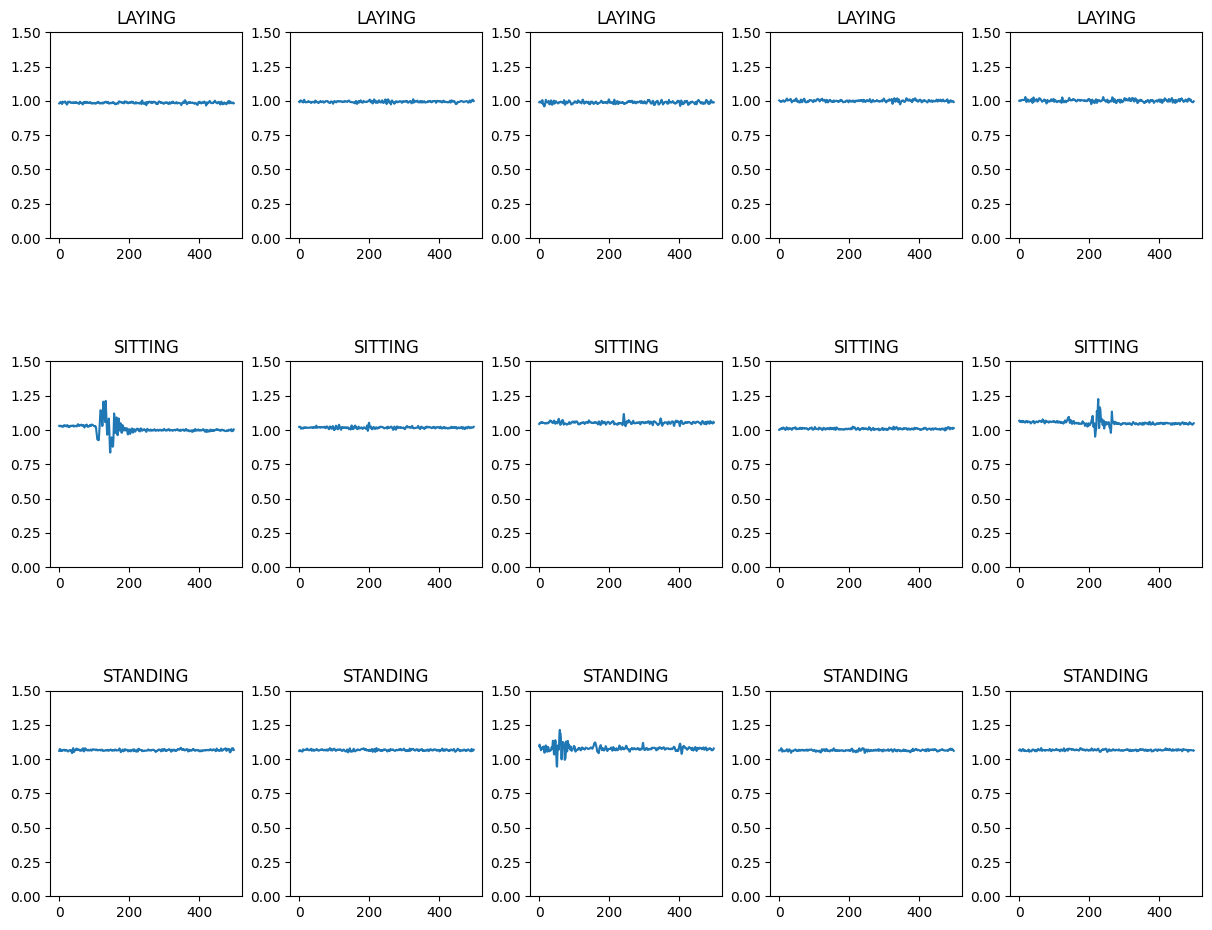

In [5]:
dataset_dir = os.path.join(combined_dir,"Train")

figure, axis = plt.subplots(3, 5)

folder_count = 0

for folder in ["LAYING", "SITTING", "STANDING"]:
    files = os.listdir(os.path.join(dataset_dir,folder))
    
    X_train=[]
    y_train=[]
    count = 0


    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]

        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        axis[folder_count, count-1].plot(df["linacc"].values)
        axis[folder_count, count-1].set_title(folder)
        axis[folder_count, count-1].set_ylim(0, 1.5)
    
    folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.6)
plt.show()

### For Dynamic Activities

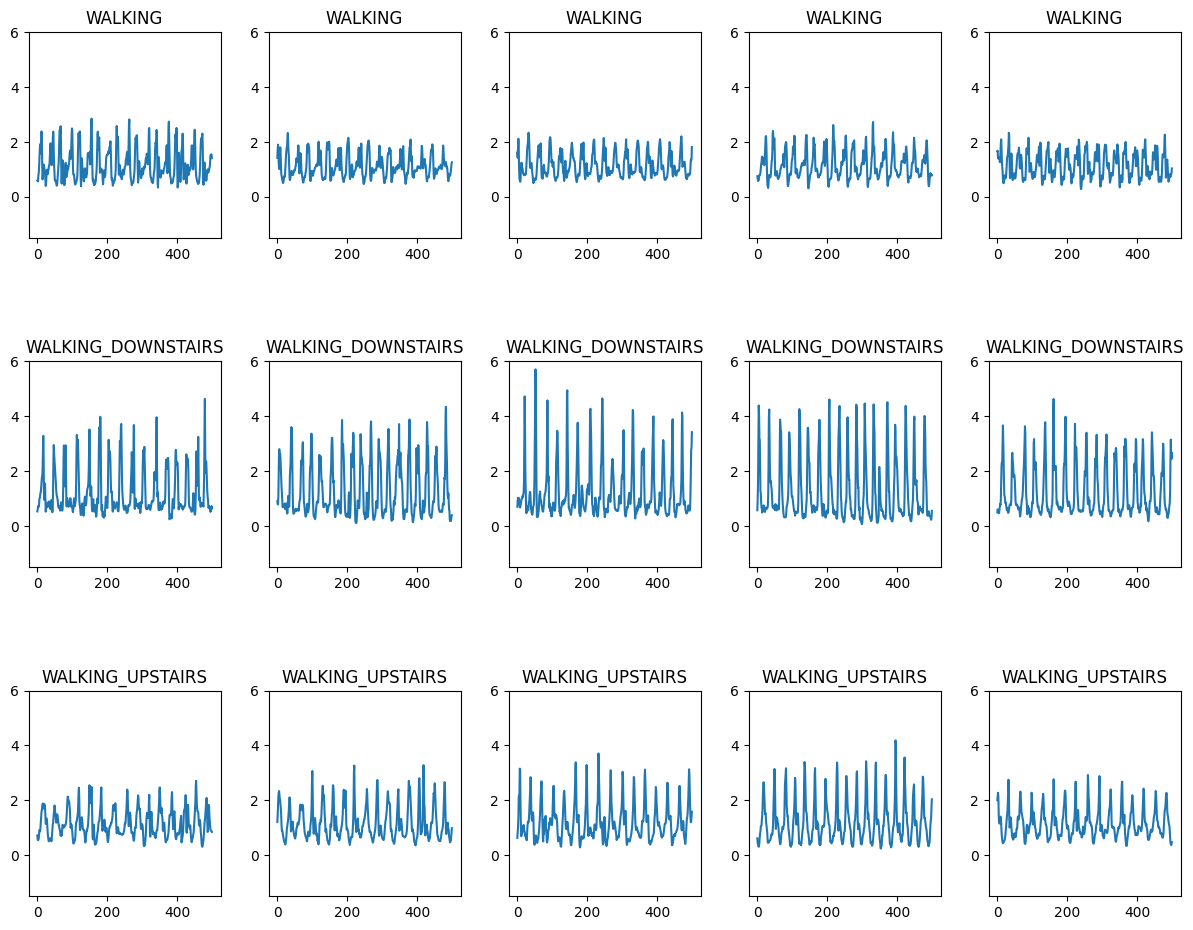

In [6]:
dataset_dir = os.path.join(combined_dir,"Train")

figure, axis = plt.subplots(3, 5)

folder_count = 0

for folder in ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]:
    files = os.listdir(os.path.join(dataset_dir,folder))
    
    X_train=[]
    y_train=[]
    count = 0


    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]

        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        axis[folder_count, count-1].plot(df["linacc"].values)
        axis[folder_count, count-1].set_title(folder)
        axis[folder_count, count-1].set_ylim(-1.5, 6)
    
    folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.6)
plt.show()

### Q2. Do you think we need a machine learning model to differentiate between static and dynamic activities based on the data?

### Ans. Reasoning 1 mark

## Training Decision Tree using Training Set

In [7]:
from MakeDataset import *
from sklearn.tree import DecisionTreeClassifier

In [8]:
xtrain = X_train.reshape(108,1500)
ytrain = y_train

print("xTrain Size:", xtrain.shape, "and yTrain Size:", ytrain.shape)

xTrain Size: (108, 1500) and yTrain Size: (108,)


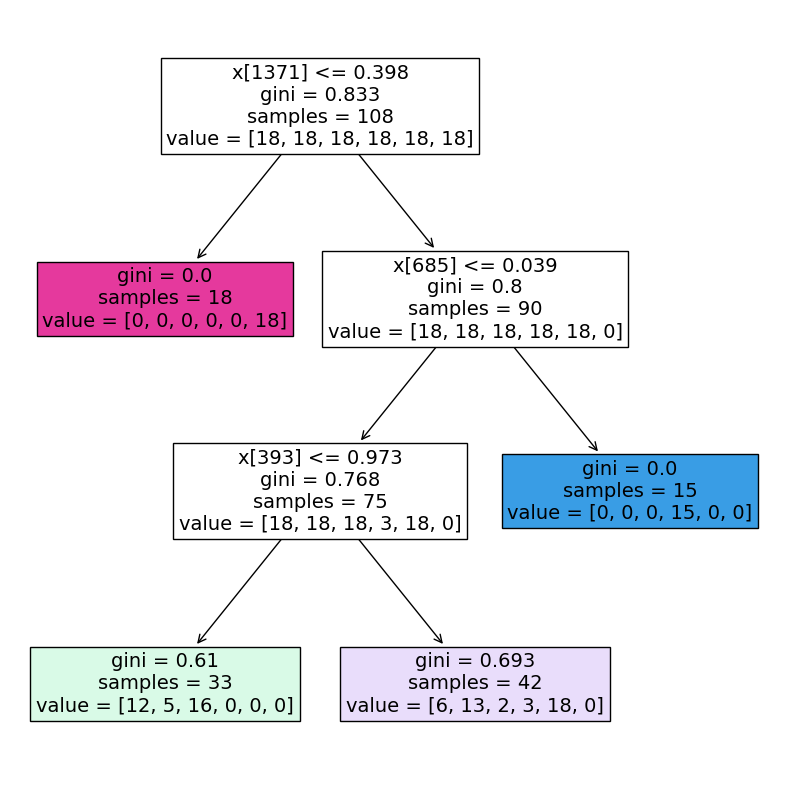

In [9]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(xtrain, ytrain)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, fontsize=14)
plt.show()


### Accuracy and Confusion Matrix of the decision tree using testset

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

yPred = dt.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, yPred, labels=[1,2,3,4,5,6]))
cm = confusion_matrix(y_test, yPred, labels=[1,2,3,4,5,6])

Accuracy Score: 0.6111111111111112


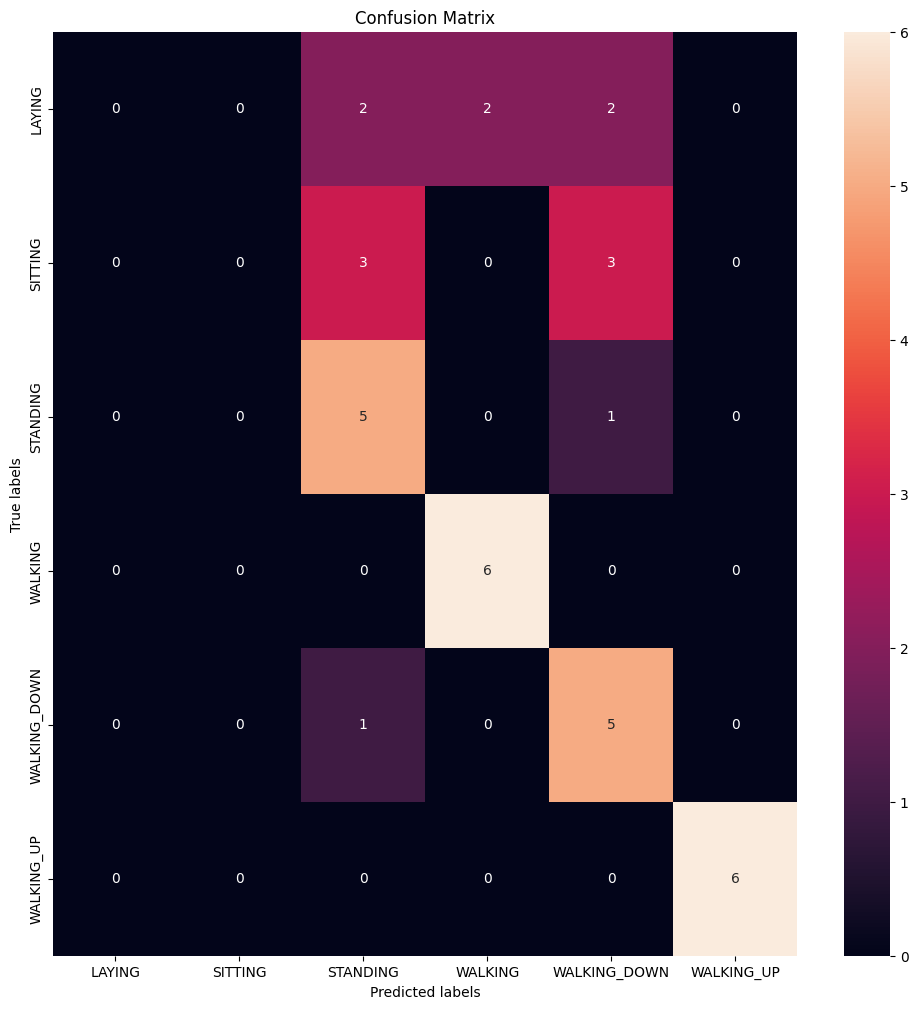

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


label_names = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWN","WALKING_UP"]

plt.figure(figsize=(12,12))
ax= plt.subplot()
# sns.set(font_scale=1.4)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10) 

ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()

## Training Decision Tree for varying depths (2 to 8) using Training Set

FileNotFoundError: [Errno 2] No such file or directory: './Figures/Decision-Trees/varying-depth2.pdf'

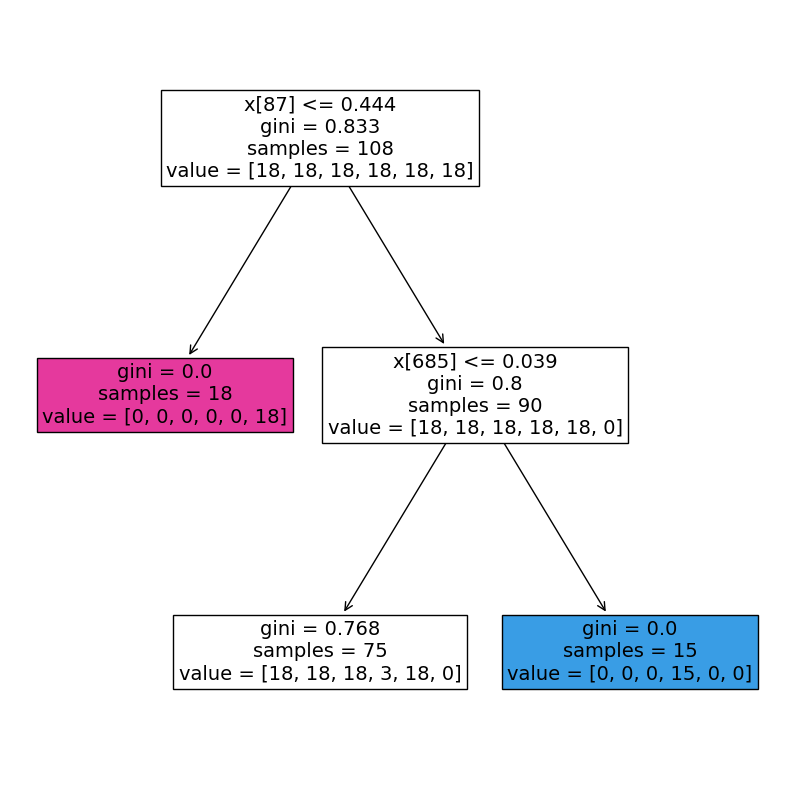

In [12]:
from sklearn.tree import plot_tree

dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(xtrain, ytrain)

plt.figure(figsize=(10,10))
plot_tree(dt2, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth2.pdf")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_values = []

yPred = dt2.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.4444444444444444
Confusion Matrix:
 [[4 0 0 2 0 0]
 [6 0 0 0 0 0]
 [5 0 0 0 0 1]
 [0 0 0 6 0 0]
 [6 0 0 0 0 0]
 [0 0 0 0 0 6]]


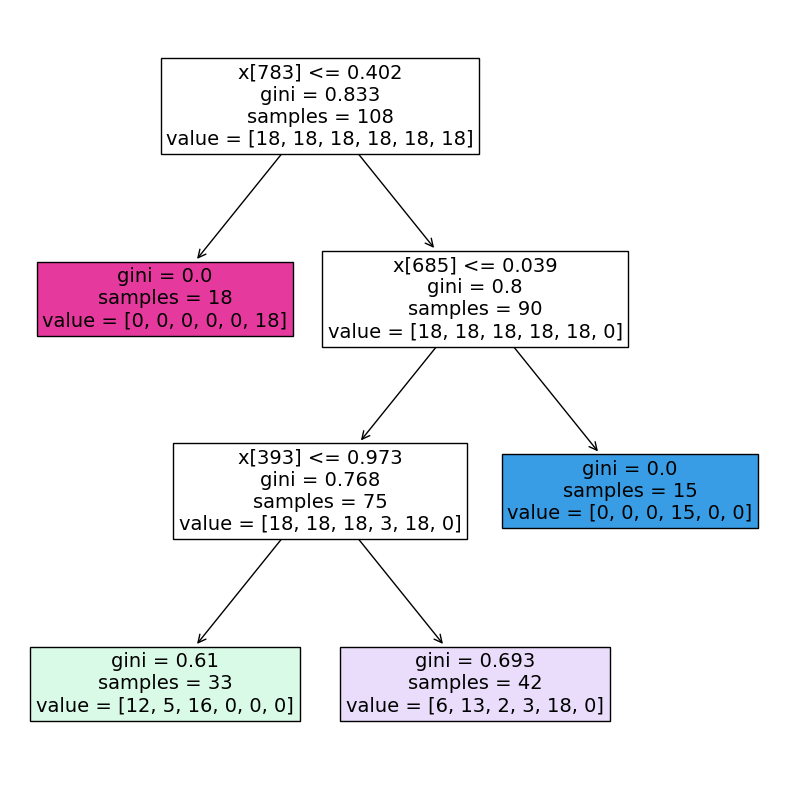

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(xtrain, ytrain)

plt.figure(figsize=(10,10))
plot_tree(dt3, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth3.pdf")
plt.show()


In [ ]:
yPred = dt3.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.6111111111111112
Confusion Matrix:
 [[0 0 2 2 2 0]
 [0 0 3 0 3 0]
 [0 0 5 0 1 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]


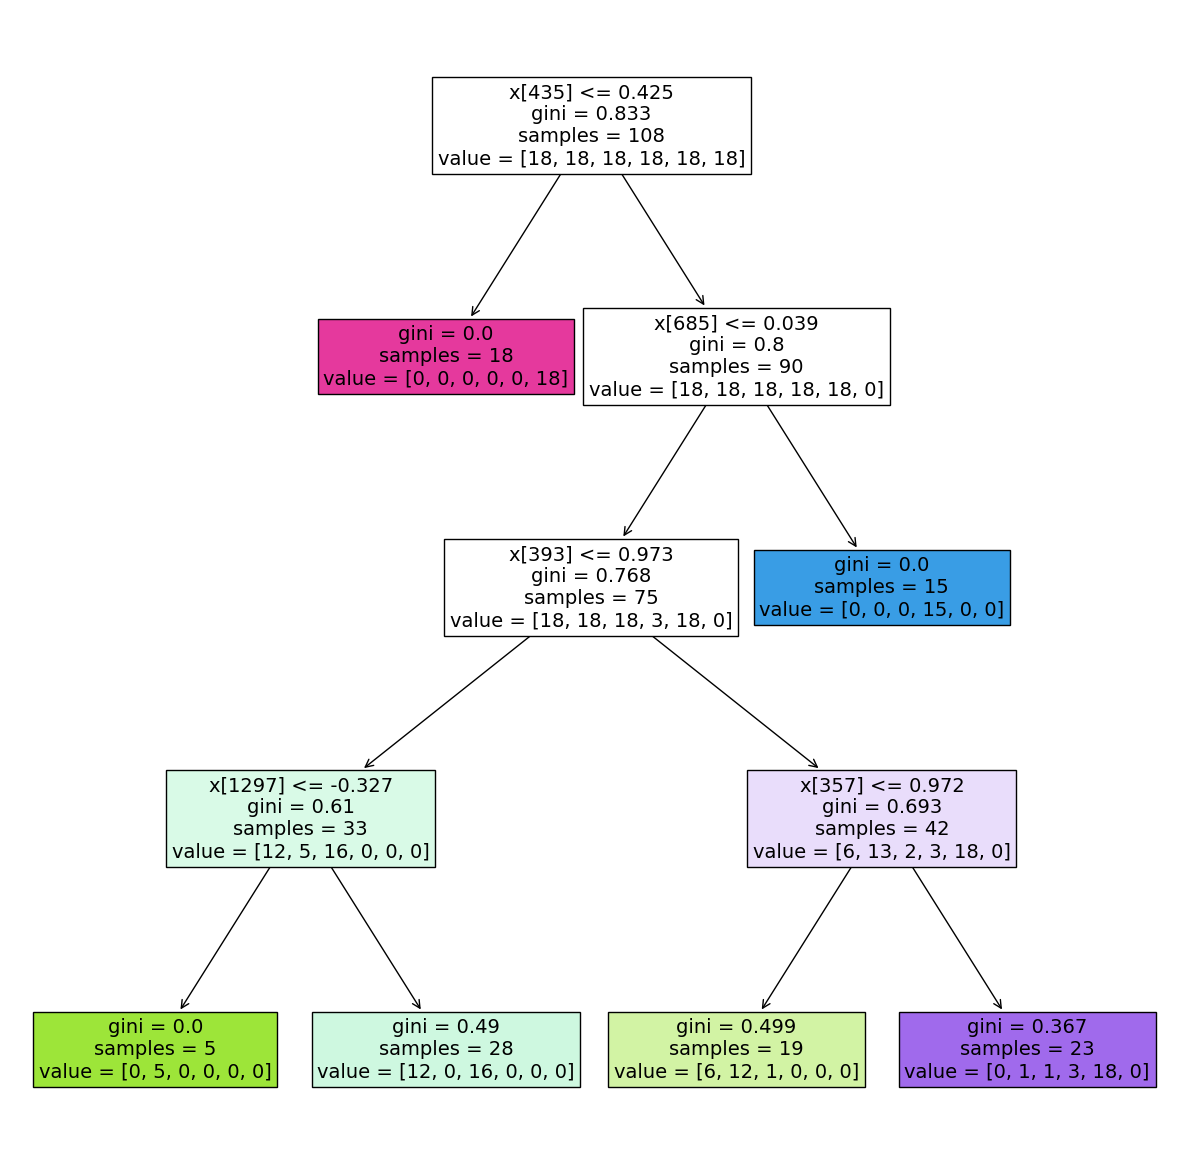

In [ ]:
dt4 = DecisionTreeClassifier(max_depth=4)
dt4.fit(xtrain, ytrain)

plt.figure(figsize=(15,15))
plot_tree(dt4, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth4.pdf")
plt.show()

In [ ]:
yPred = dt4.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.6666666666666666
Confusion Matrix:
 [[0 1 2 2 1 0]
 [0 3 2 0 1 0]
 [0 2 4 0 0 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]


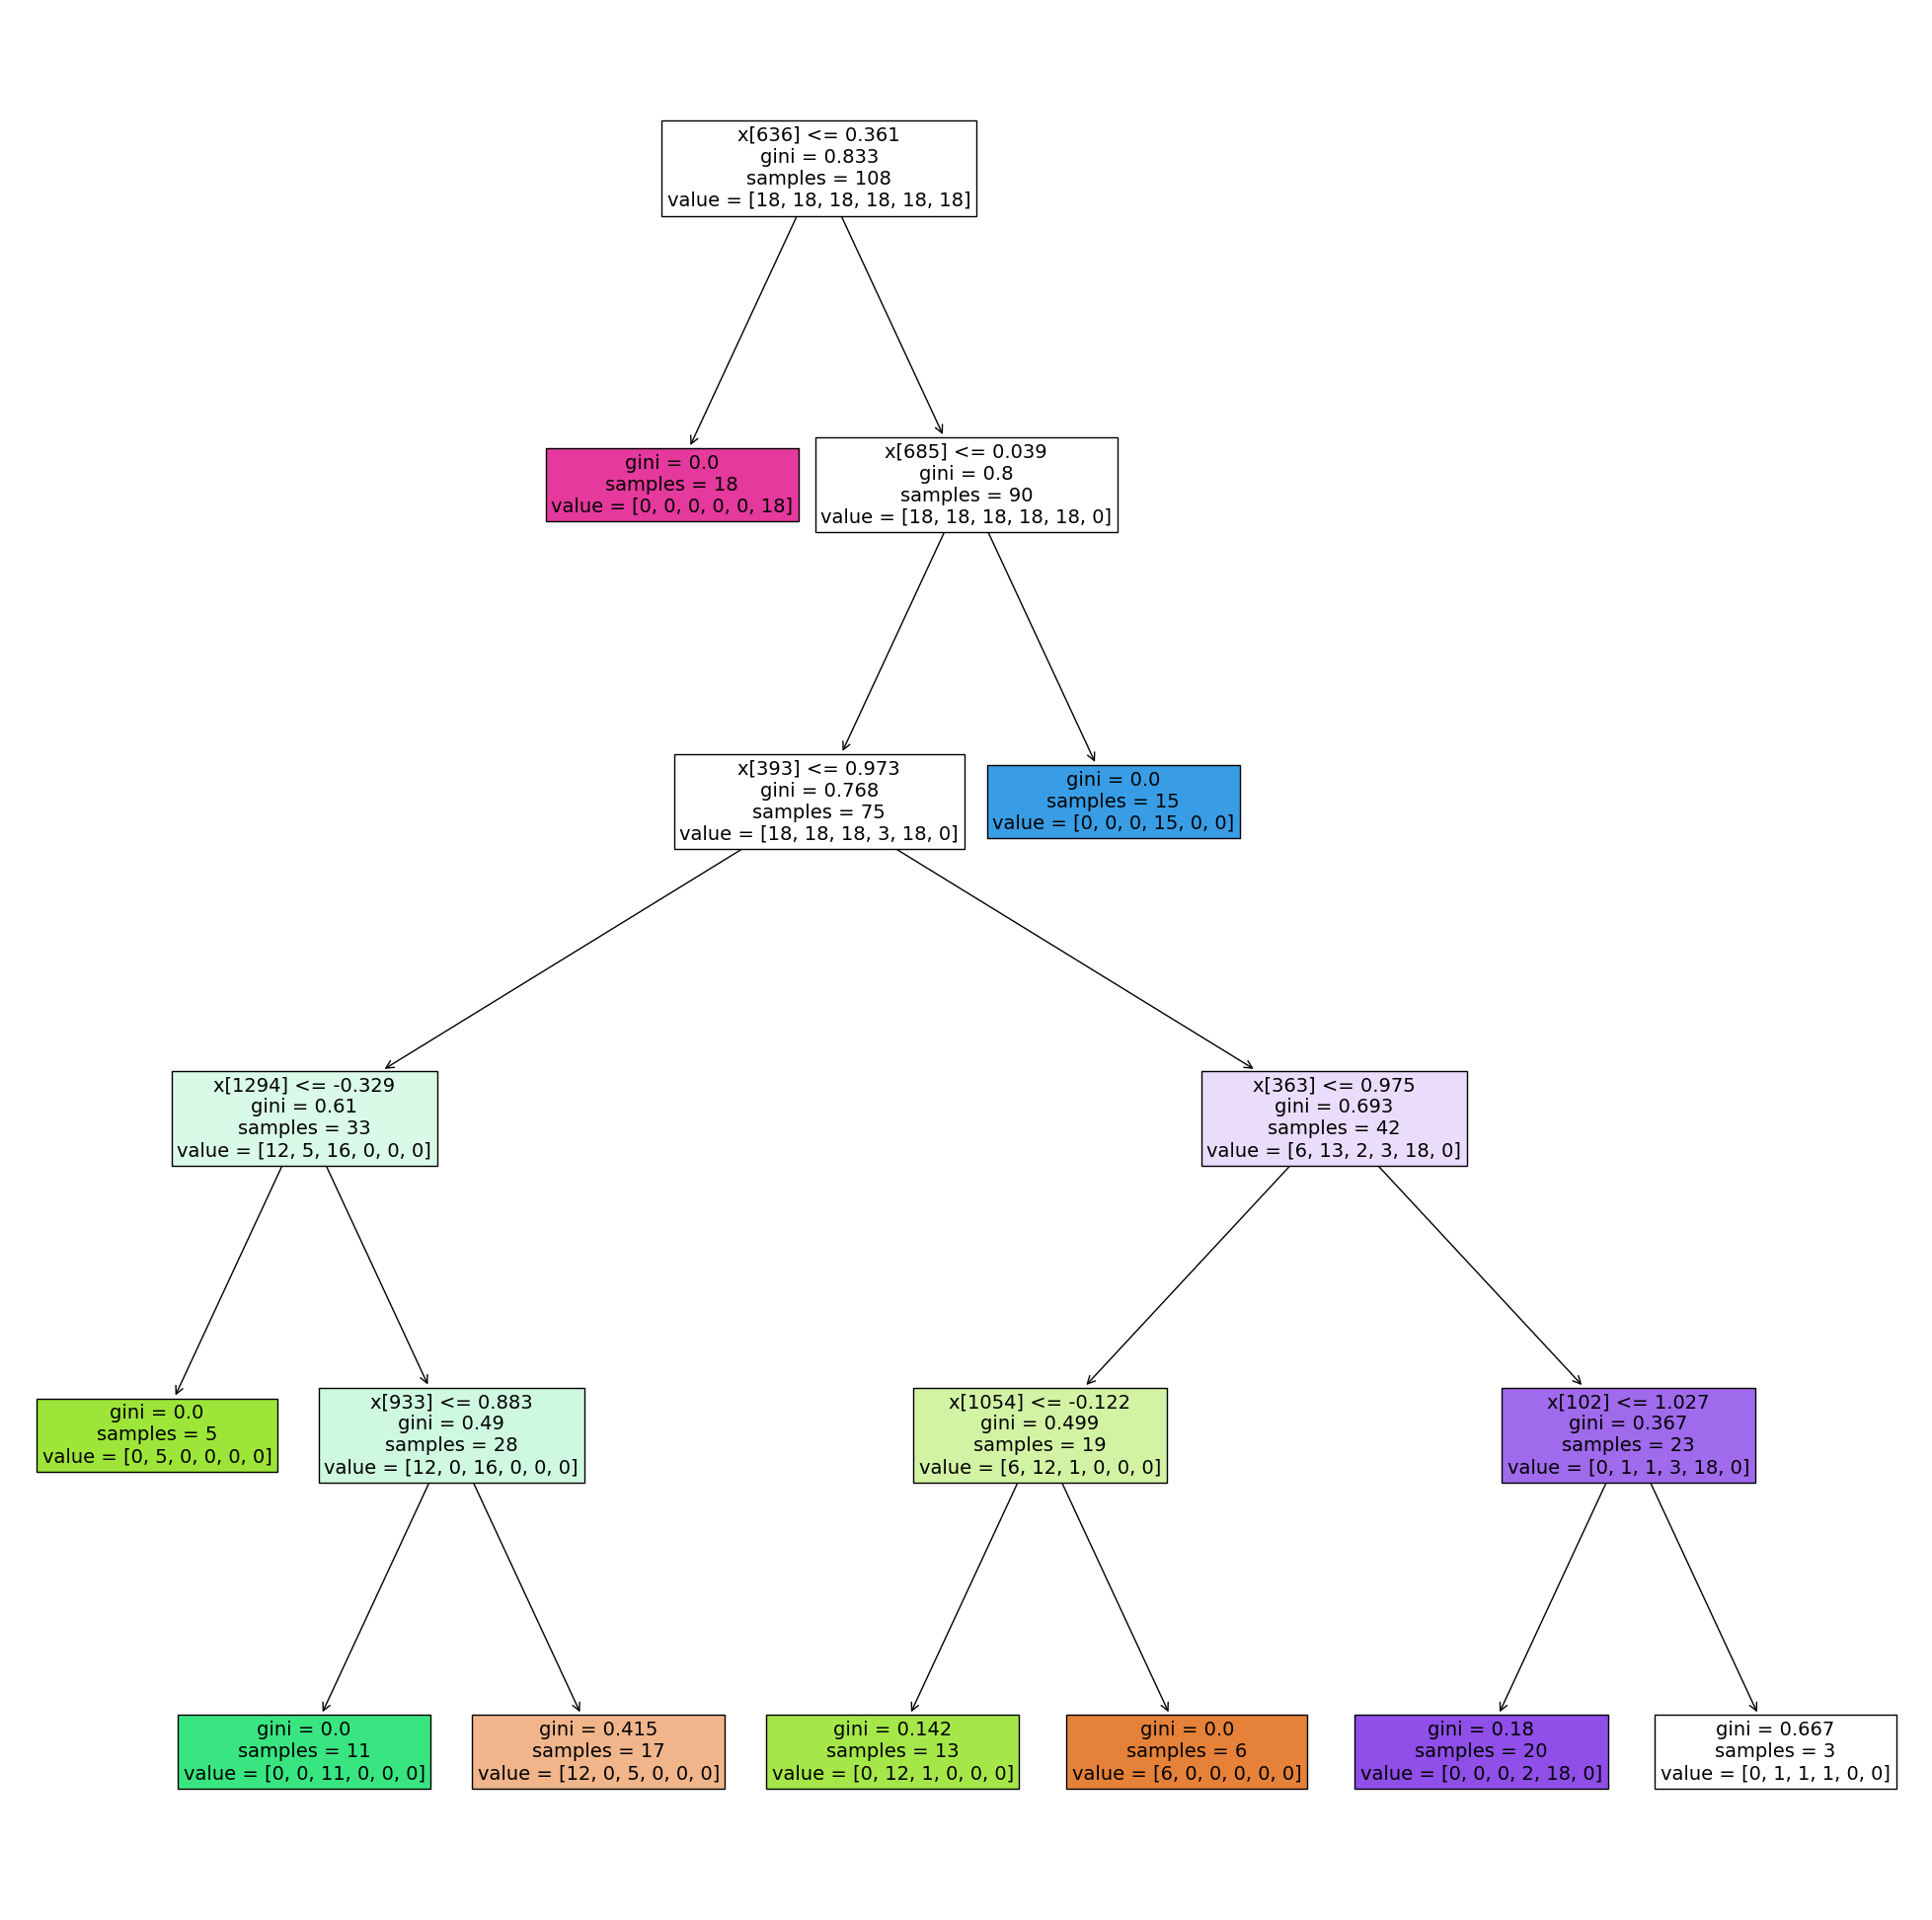

In [ ]:
dt5 = DecisionTreeClassifier(max_depth=5)
dt5.fit(xtrain, ytrain)

plt.figure(figsize=(25,25))
plot_tree(dt5, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth5.pdf")
plt.show()

In [ ]:
yPred = dt5.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.5833333333333334
Confusion Matrix:
 [[0 2 2 2 0 0]
 [1 3 1 0 1 0]
 [3 1 1 0 1 0]
 [0 0 0 6 0 0]
 [1 0 0 0 5 0]
 [0 0 0 0 0 6]]


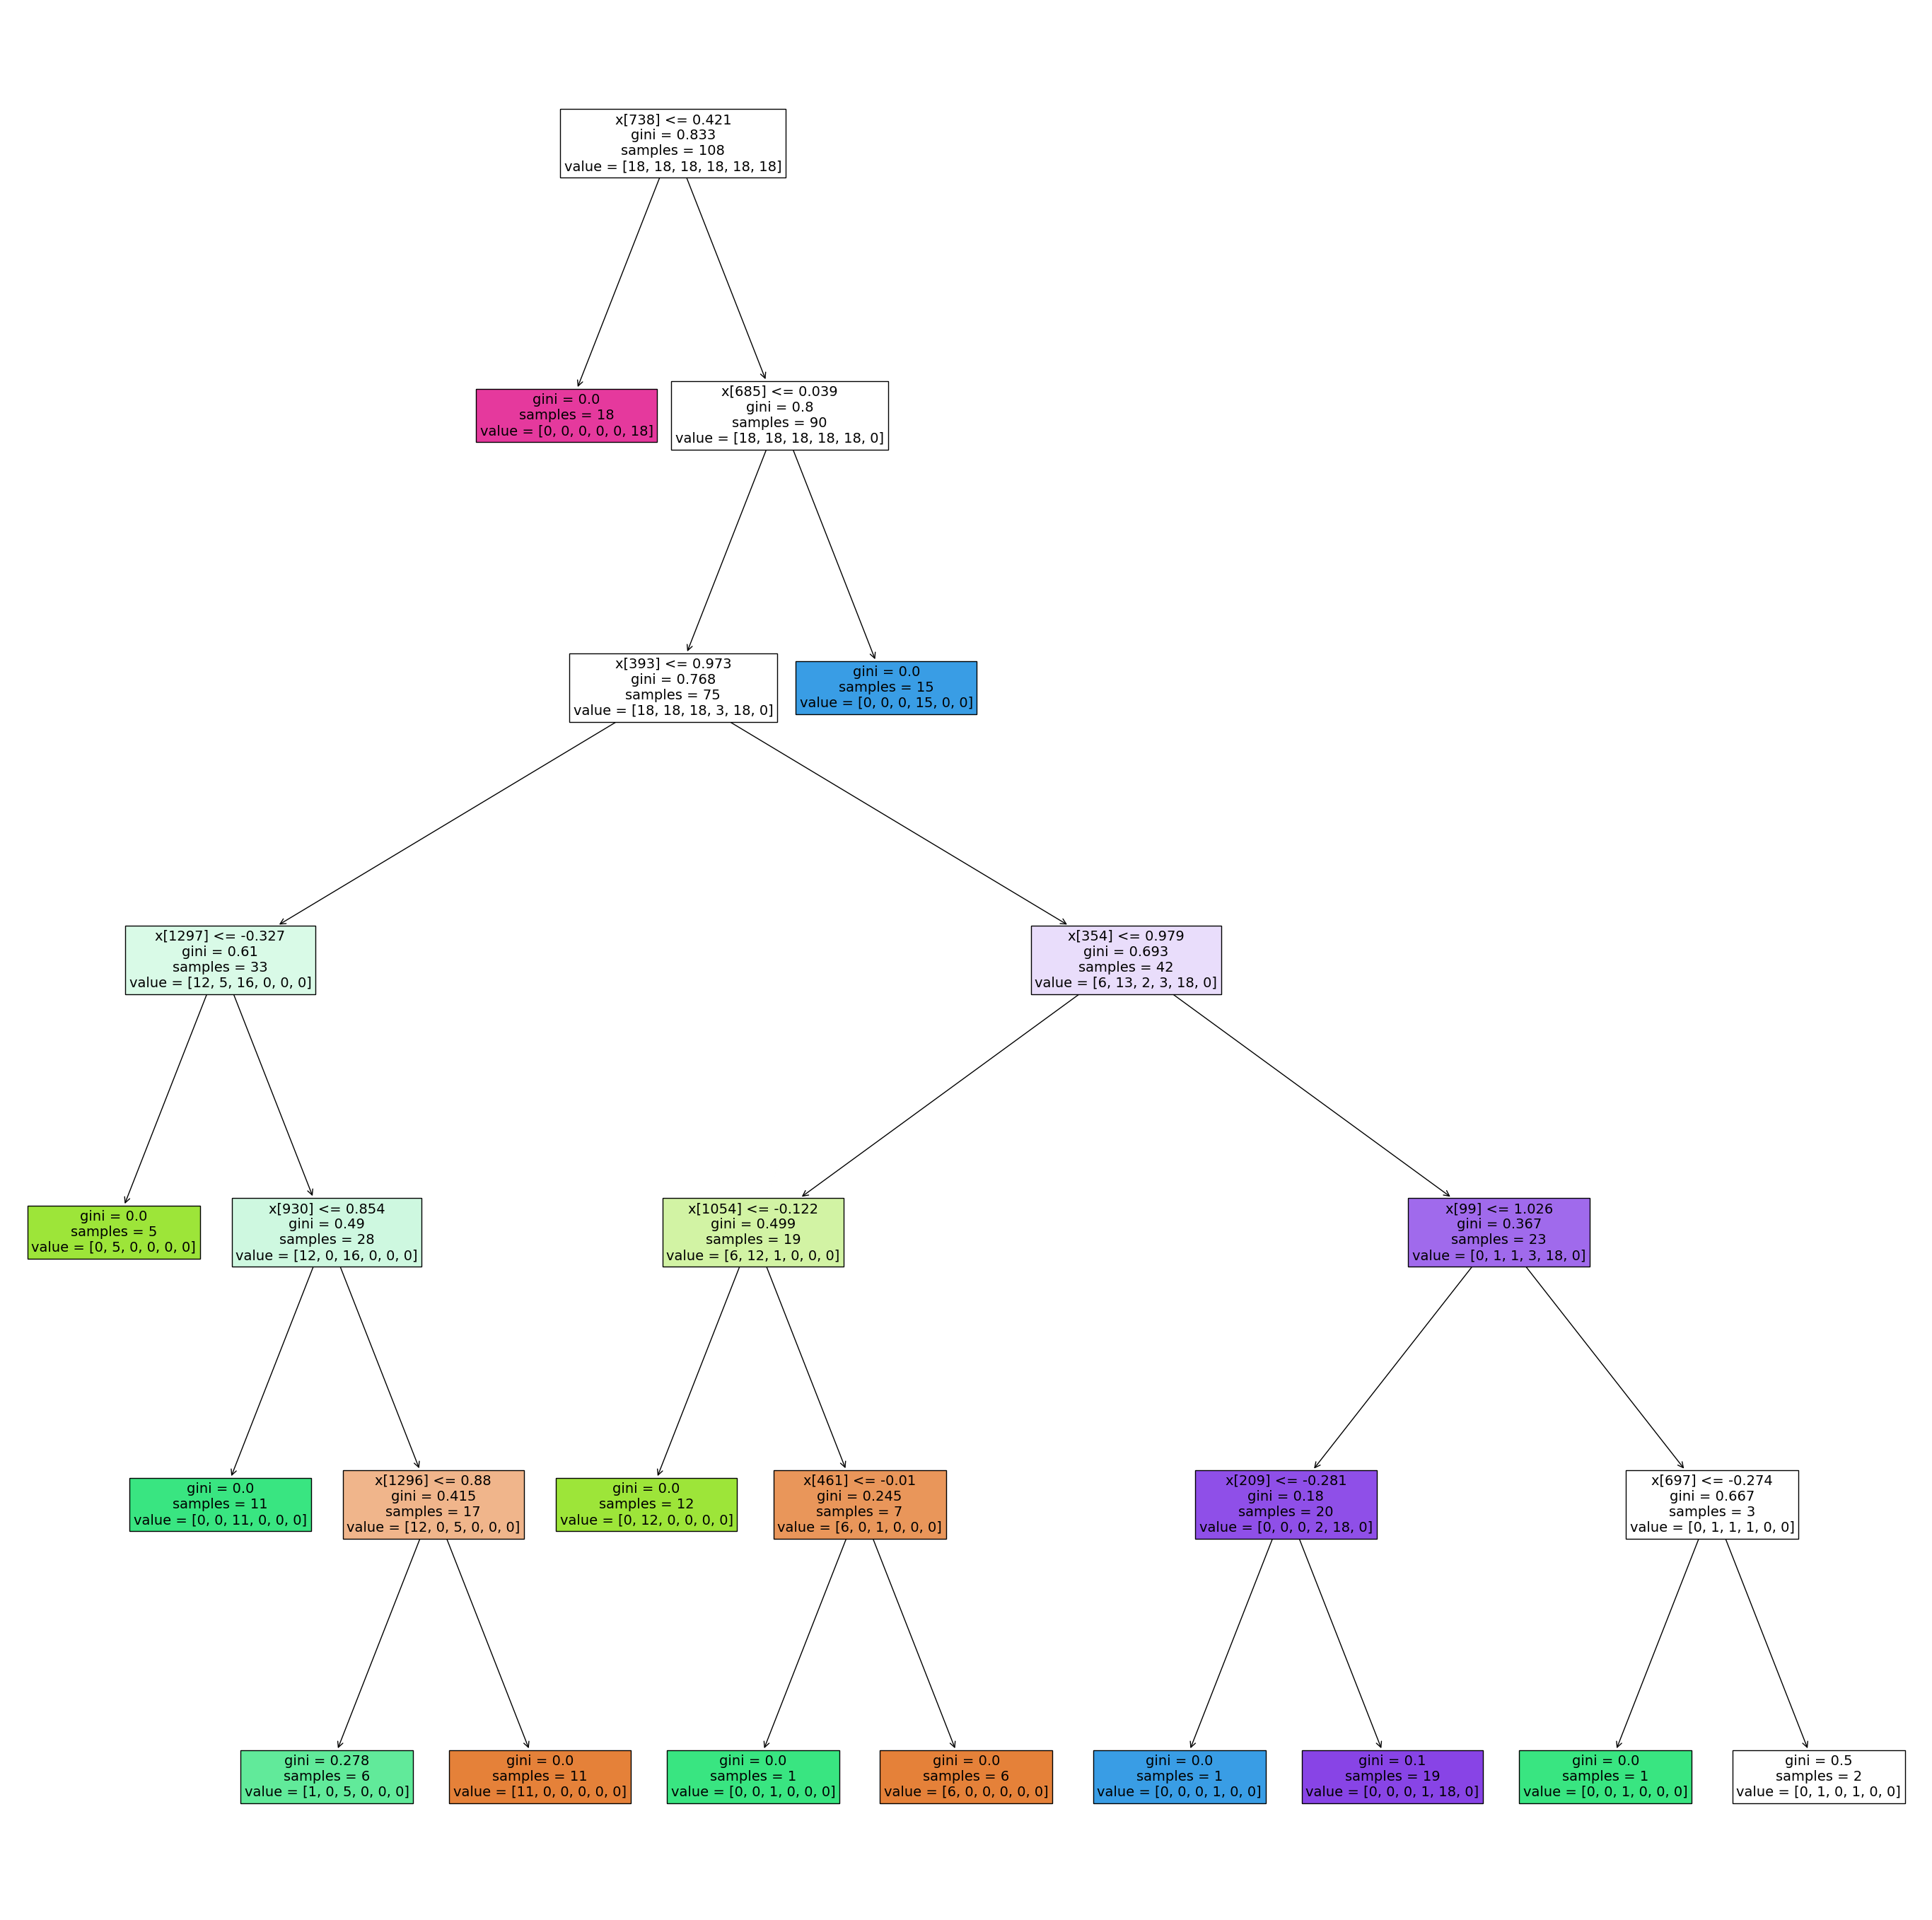

In [ ]:
dt6 = DecisionTreeClassifier(max_depth=6)
dt6.fit(xtrain, ytrain)

plt.figure(figsize=(35,35))
plot_tree(dt6, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth6.pdf")
plt.show()


In [ ]:
yPred = dt6.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.6666666666666666
Confusion Matrix:
 [[2 2 0 2 0 0]
 [1 3 1 0 1 0]
 [2 1 3 0 0 0]
 [0 0 0 6 0 0]
 [1 1 0 0 4 0]
 [0 0 0 0 0 6]]


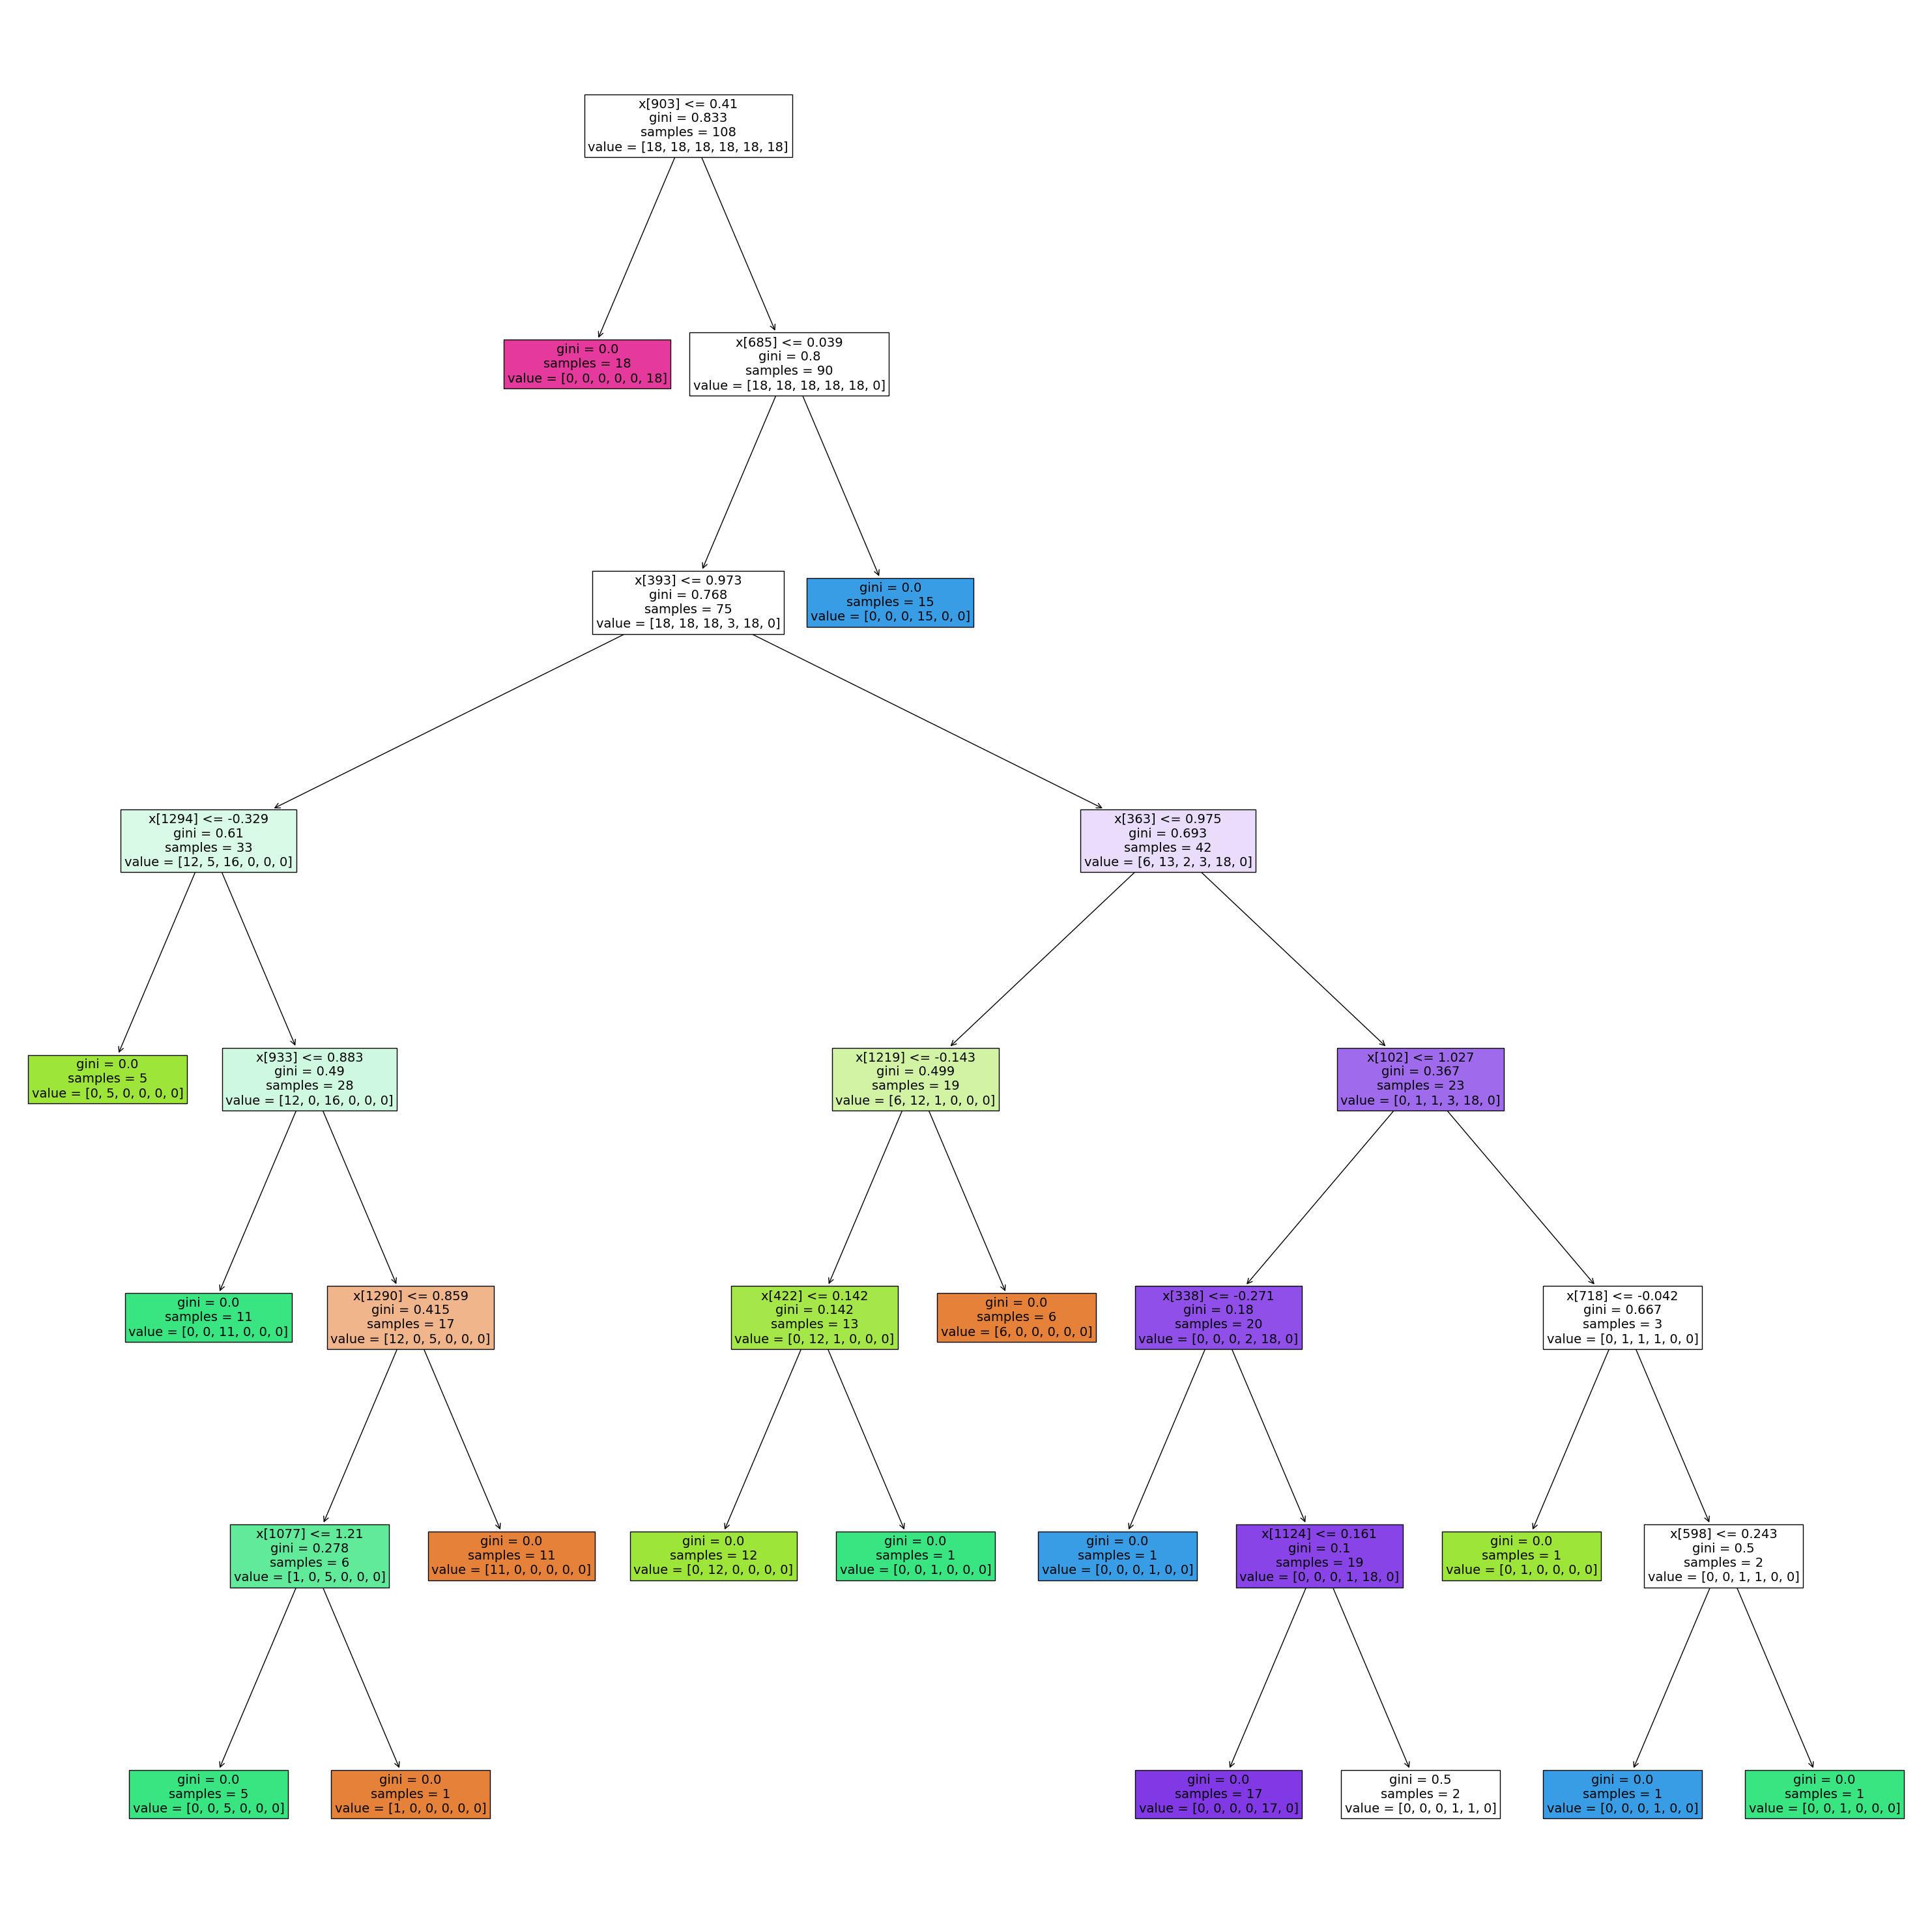

In [ ]:
dt7 = DecisionTreeClassifier(max_depth=7)
dt7.fit(xtrain, ytrain)

plt.figure(figsize=(38,38))
plot_tree(dt7, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth7.pdf")
plt.show()

In [ ]:
yPred = dt7.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.5555555555555556
Confusion Matrix:
 [[0 1 2 3 0 0]
 [1 3 1 0 1 0]
 [3 1 1 1 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


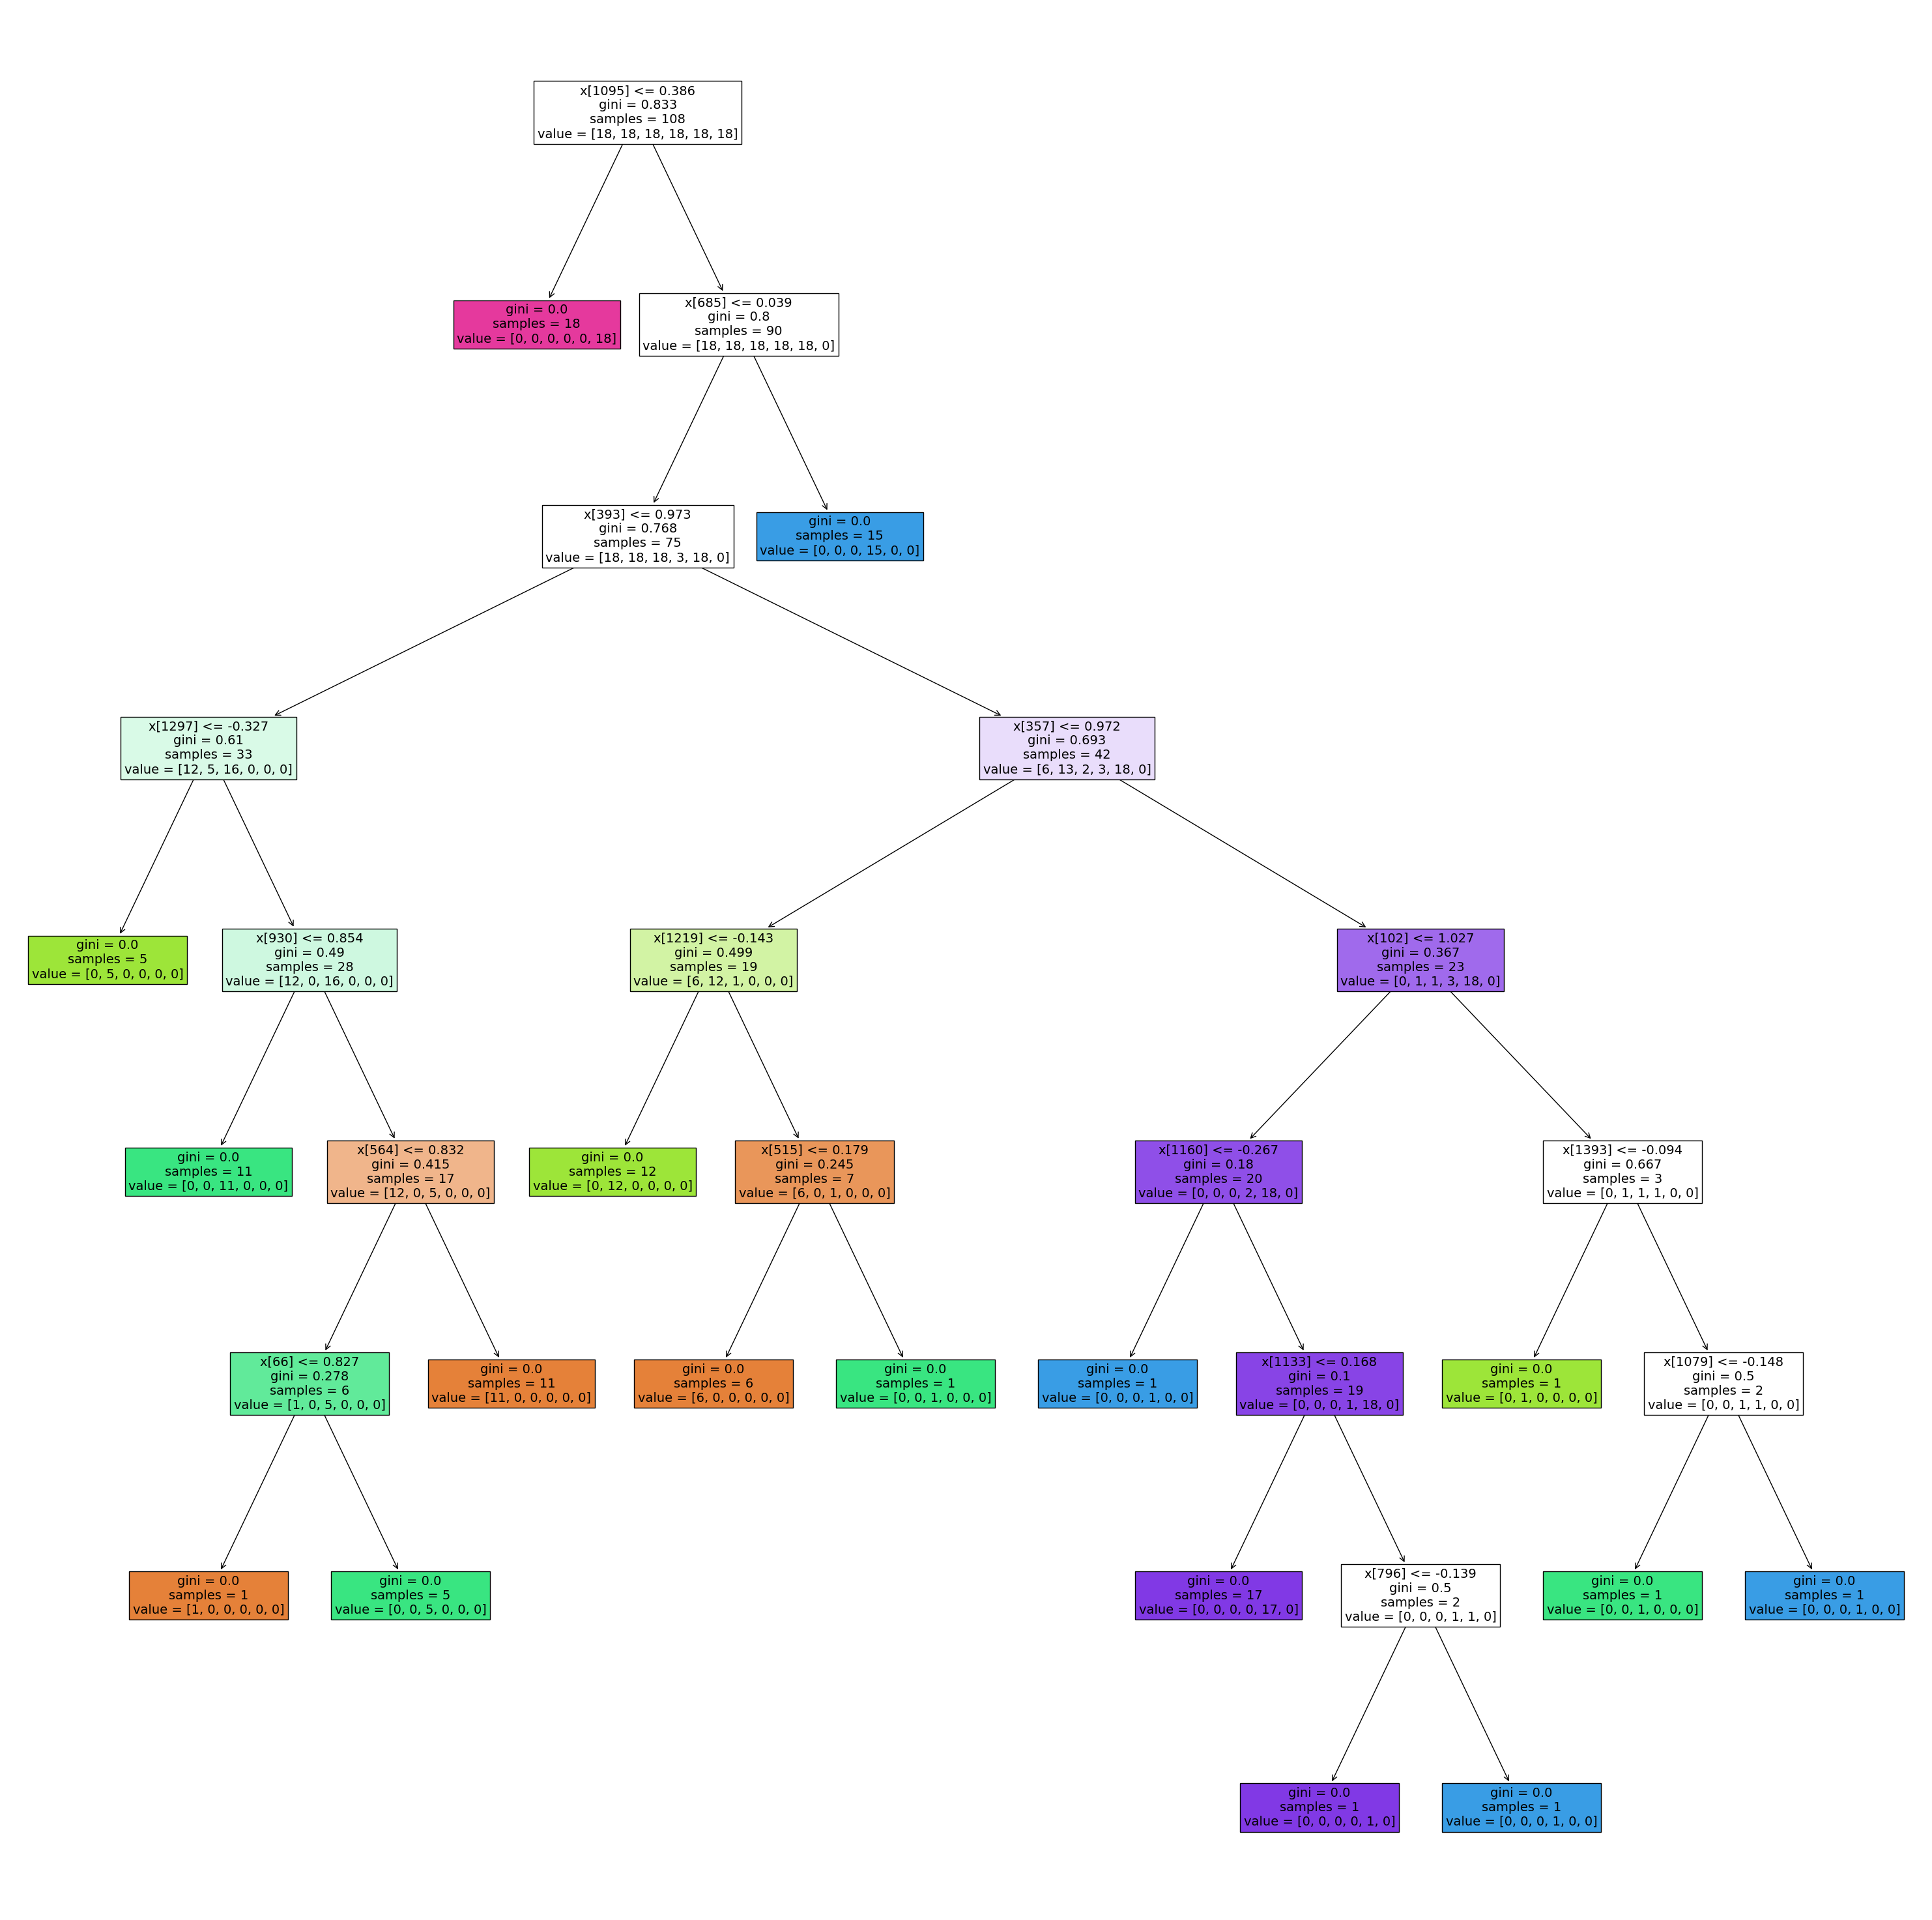

In [ ]:
dt8 = DecisionTreeClassifier(max_depth=8)
dt8.fit(xtrain, ytrain)

plt.figure(figsize=(38,38))
plot_tree(dt8, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth8.pdf")
plt.show()


In [ ]:
yPred = dt8.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))
accuracy_values.append(accuracy_score(y_test, yPred))
print("Confusion Matrix:\n", confusion_matrix(y_test, yPred))

Accuracy Score: 0.5833333333333334
Confusion Matrix:
 [[1 1 1 3 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


### Ploting the Accuracy Graph for varying depths of Decision Tree

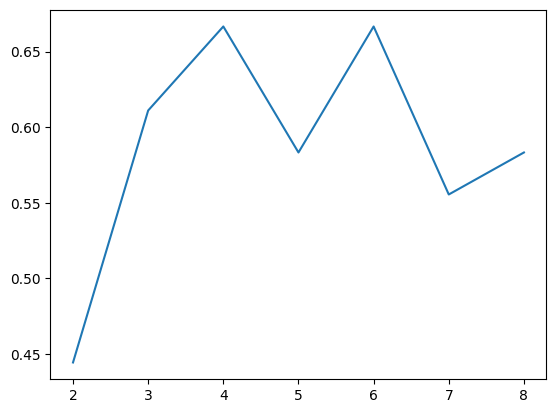

In [ ]:
plt.plot(range(2,9), accuracy_values)
plt.savefig("./Figures/Decision-Trees/accuracy-vs-depth.pdf")

### Q4. Does the accuracy changes when the depth is increased? Reason why such a result has been obtained?

### Ans. Reasoning 1 Mark

## Using PCA and TSFEL

### Using PCA on Acceleration data to convert into two features

In [ ]:
from MakeDataset import *
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pca_acceleration = PCA(n_components=2)

In [ ]:
acc_data=[]

dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

for dataset_dir in [dataset_dir1, dataset_dir2]:
    # for folder in ["LAYING"]:
    # for folder in ["SITTING"]:
    # for folder in ["STANDING"]:
    # for folder in ["WALKING"]:
    # for folder in ["WALKING_DOWNSTAIRS"]:
    for folder in ["WALKING_UPSTAIRS"]:
    # for folder in folders:
        files = os.listdir(os.path.join(dataset_dir,folder))

        count = 0

        for file in files:
        
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data.append(df["linacc"].values)
        
principalComponents_acceleration = pca_acceleration.fit(np.array(acc_data).transpose())

In [ ]:
acc_data = np.array(acc_data)
print(acc_data.shape)
print(acc_data)

(30, 500)
[[0.72030714 0.57784912 0.54236121 ... 0.88408822 0.87866183 0.84756878]
 [1.21244126 1.46495157 1.83513823 ... 0.66299512 0.80745525 0.98364258]
 [0.62760365 0.82880866 1.01859809 ... 1.22592158 1.39202911 1.58008989]
 ...
 [0.54983255 0.63010978 0.72773282 ... 2.24104454 2.27365556 2.1838233 ]
 [1.13818943 1.1189259  1.0101934  ... 2.53950498 2.74444675 2.19560879]
 [0.96638463 0.98273167 0.9486163  ... 1.09000757 1.25869173 1.57661135]]


In [ ]:
data = pca_acceleration.components_
print(data.shape)
print(data)

(2, 30)
[[-1.17202072e-01 -6.38662359e-02  3.40039387e-01  7.32974524e-02
   1.01780317e-01  5.16728136e-02 -6.26037473e-02 -2.50080589e-01
  -8.83902128e-02 -2.02660665e-01 -4.75229642e-02 -1.65183517e-01
  -1.35871501e-02  1.33540911e-03  4.08643309e-01 -2.60466574e-02
  -1.37821497e-02 -2.51131819e-01  4.46120554e-01 -3.93784579e-02
  -1.24441477e-01  2.02040044e-01 -1.81355660e-01 -9.97703362e-02
  -2.90011073e-03 -3.20431540e-01 -2.02736072e-01 -6.03463013e-02
   1.53207176e-01 -3.91438267e-02]
 [ 2.58180893e-02  2.75467841e-01 -1.17832883e-01  3.17051502e-01
   1.13572544e-01 -2.09240946e-01  3.14367168e-01 -1.83445184e-01
   4.56201113e-01 -7.19735201e-02  7.78713078e-03  1.52002222e-01
   3.78316743e-01 -2.38953868e-02  7.99293920e-02 -3.05109447e-02
   1.97688675e-02  9.66537593e-02  7.54166426e-02  1.08850060e-04
   1.83849039e-01  1.94848454e-01 -1.16489689e-01  5.84138261e-02
  -9.68776319e-03  1.10123026e-01 -2.78142684e-01  1.31936900e-01
  -1.10177963e-01  9.54280144e-02

In [ ]:
principal_acceleration_Df = pd.DataFrame({'principal component 1':data[0], 'principal component 2':data[1]})

In [ ]:
print(principal_acceleration_Df)

    principal component 1  principal component 2
0               -0.117202               0.025818
1               -0.063866               0.275468
2                0.340039              -0.117833
3                0.073297               0.317052
4                0.101780               0.113573
5                0.051673              -0.209241
6               -0.062604               0.314367
7               -0.250081              -0.183445
8               -0.088390               0.456201
9               -0.202661              -0.071974
10              -0.047523               0.007787
11              -0.165184               0.152002
12              -0.013587               0.378317
13               0.001335              -0.023895
14               0.408643               0.079929
15              -0.026047              -0.030511
16              -0.013782               0.019769
17              -0.251132               0.096654
18               0.446121               0.075417
19              -0.0

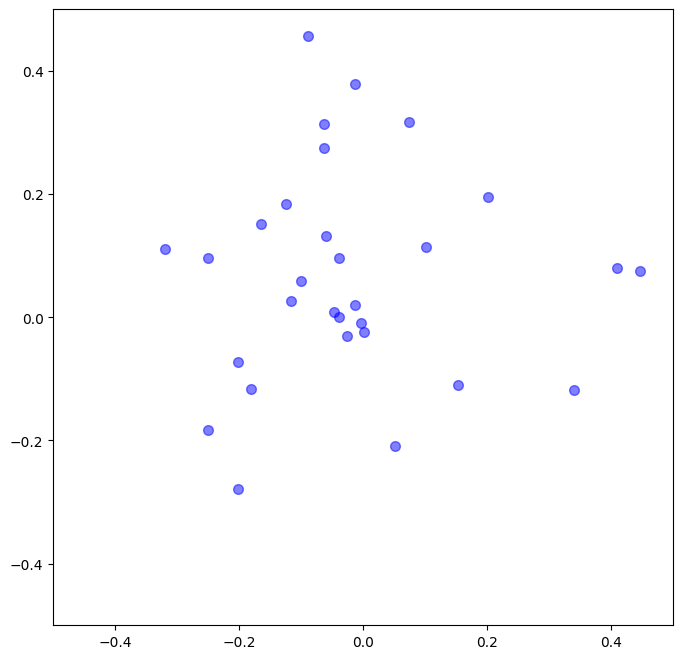

In [ ]:
plt.figure(figsize = (8,8))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

plt.plot(principal_acceleration_Df['principal component 1'], principal_acceleration_Df['principal component 2'], 'o', markersize=7, color='blue', alpha=0.5)
plt.show()

### Subplots of PCA for all the classes in a Subplot

In [ ]:
from MakeDataset import *
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
pca_acceleration = PCA(n_components=2)

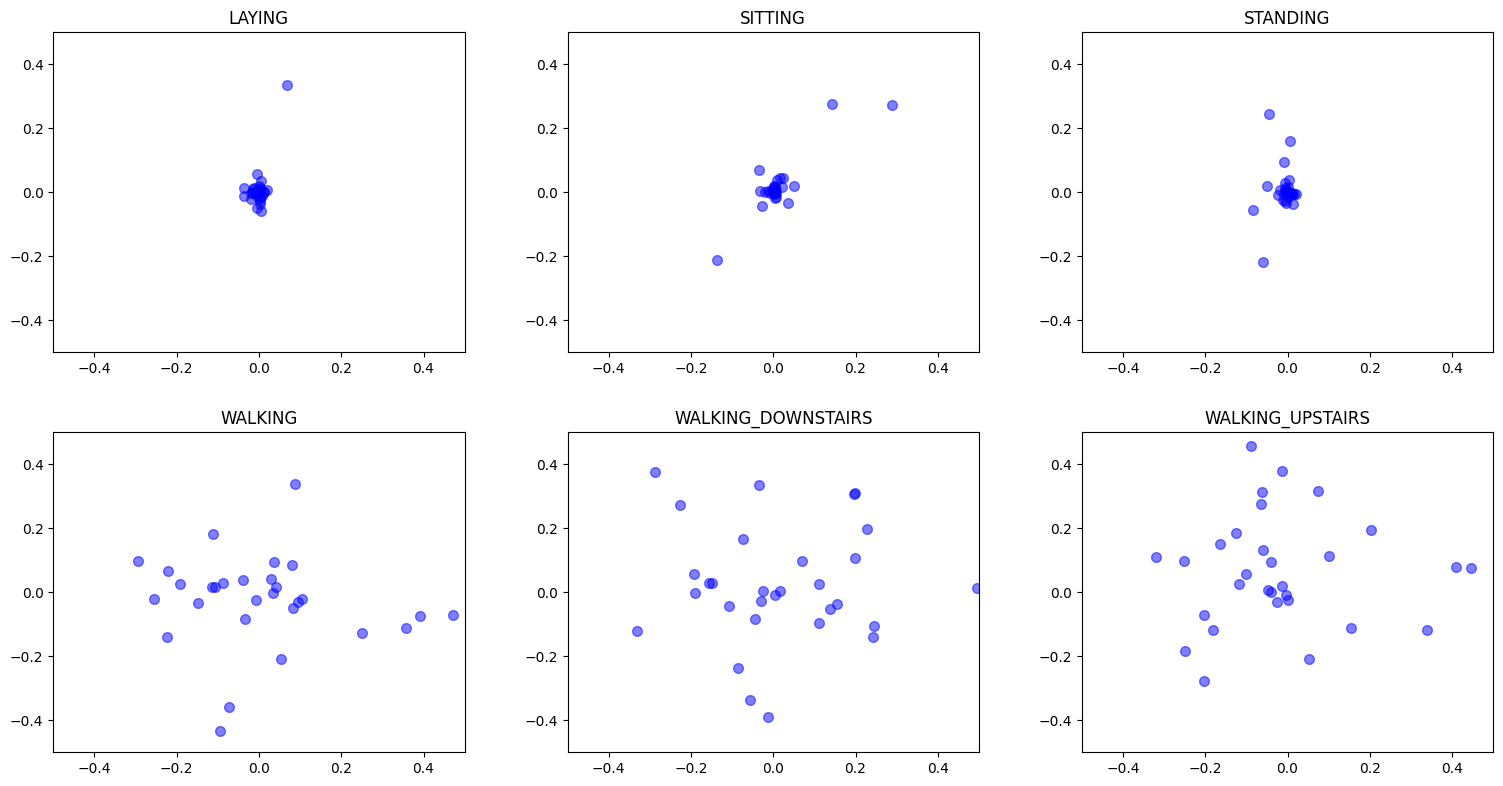

In [ ]:
dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

figure, axis = plt.subplots(2, 3, figsize = (8,4))

folder_count = 0
activity_count = 0

for folder in folders:
    acc_data=[] 
    for dataset_dir in [dataset_dir1, dataset_dir2]:
        files = os.listdir(os.path.join(dataset_dir,folder))

        count = 0

        for file in files:
          
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data.append(df["linacc"].values)
        
    principalComponents_acceleration = pca_acceleration.fit(np.array(acc_data).transpose())

    data = pca_acceleration.components_

    axis[folder_count, activity_count].plot(data[0], data[1], 'o', markersize=7, color='blue', alpha=0.5)
    axis[folder_count, activity_count].set_title(folder)
    axis[folder_count, activity_count].set_xlim(-0.5,0.5)
    axis[folder_count, activity_count].set_ylim(-0.5,0.5)
        
    activity_count += 1
    if activity_count == 3:
        activity_count = 0
        folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.25)
plt.show()

### Using TSFEL on Acceleration data to convert into two features

In [ ]:
import tsfel

In [ ]:
dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

folder_count = 0
acc_data_tsfel = []

# for folder in ["LAYING"]:
# for folder in ["SITTING"]:
# for folder in ["STANDING"]:
# for folder in ["WALKING"]:
# for folder in ["WALKING_DOWNSTAIRS"]:
# for folder in ["WALKING_UPSTAIRS"]:
for folder in folders:
    for dataset_dir in [dataset_dir1, dataset_dir2]:
        files = os.listdir(os.path.join(dataset_dir,folder))
        count = 0
        for file in files:
            
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data_tsfel.append(df["linacc"].values)
            # break
        # break 
    # break

In [ ]:
cfg = tsfel.get_features_by_domain()
print(np.array(acc_data_tsfel).shape)
# Extract features
X = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, fs=50, verbose=1)

(180, 500)
*** Feature extraction started ***



*** Feature extraction finished ***


(180, 384)
     0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0           486.076839                9.839999         486.076839   
1           493.699440                9.916712         493.699440   
2           488.775558                9.866995         488.775558   
3           500.294418                9.982773         500.294418   
4           502.040010               10.000068         502.040010   
..                 ...                     ...                ...   
175         841.736615               11.574623         841.736615   
176         901.282944               11.737691         901.282944   
177         781.932989               11.350438         781.932989   
178         791.744239               11.378087         791.744239   
179         675.633485               10.988357         675.633485   

     0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0          48.705094    4.988910                      100.0   
1          49.468882    4.992718  

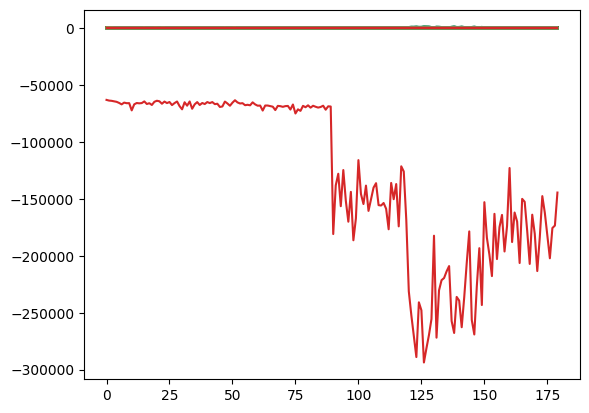

In [ ]:
print(X.shape)
print(X)
print(np.array(X).shape)
print(np.array(X)[0])
plt.plot(np.array(X))
plt.show()

### Using TSFEL on Acceleration data subplot comparision of all activities

In [ ]:
import IPython
import warnings

warnings.filterwarnings("ignore")   

In [ ]:
import tsfel
from sklearn.decomposition import PCA
cfg = tsfel.get_features_by_domain()
pca_acceleration = PCA(n_components=2)

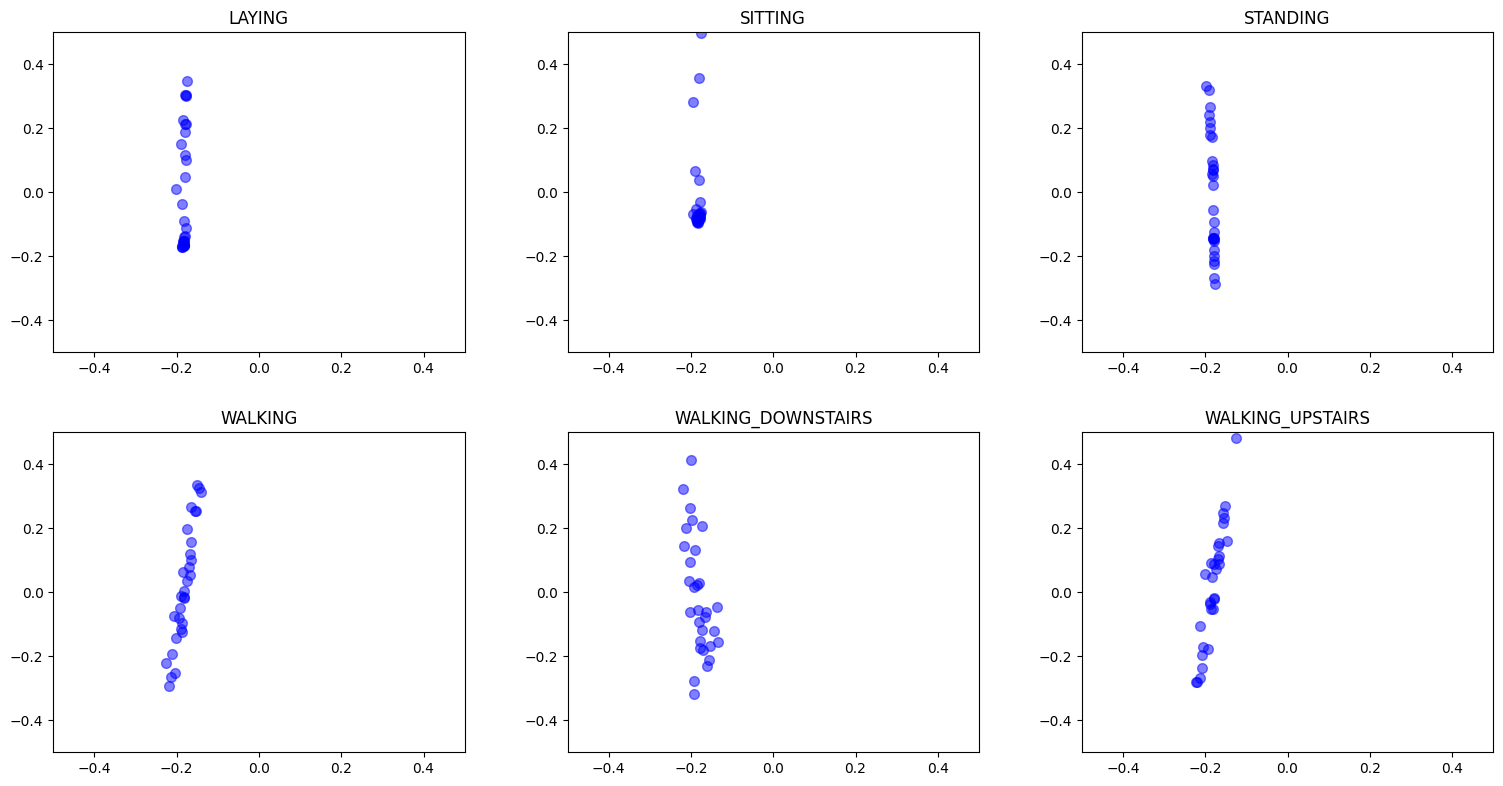

In [ ]:
dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

figure, axis = plt.subplots(2, 3, figsize = (8,4))

folder_count = 0
activity_count = 0

# for folder in ["LAYING"]:
for folder in folders:
    acc_data_tsfel = []
    for dataset_dir in [dataset_dir1, dataset_dir2]:
        files = os.listdir(os.path.join(dataset_dir,folder))
        count = 0
        for file in files:
            
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data_tsfel.append(df["linacc"].values)
    
    acc_data_tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose = 1)
    IPython.display.clear_output()
    
    principalComponents_acceleration = pca_acceleration.fit(np.array(acc_data_tsfel_features).transpose())

    data = pca_acceleration.components_

    axis[folder_count, activity_count].plot(data[0], data[1], 'o', markersize=7, color='blue', alpha=0.5)
    axis[folder_count, activity_count].set_title(folder)
    axis[folder_count, activity_count].set_xlim(-0.5,0.5)
    axis[folder_count, activity_count].set_ylim(-0.5,0.5)

    activity_count += 1
    if activity_count == 3:
        activity_count = 0
        folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.25)
plt.show()

## Features from TSFEL to train and then test decision tree

In [ ]:
import os
import tsfel
import IPython
import warnings
import numpy as np
import pandas as pd
cfg = tsfel.get_features_by_domain()
from sklearn.decomposition import PCA
pca_acceleration = PCA(n_components=2)
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore") 

In [ ]:
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

In [ ]:
count_files = 1
for folder in folders:
    files = os.listdir(os.path.join(combined_dir,"Train",folder))
    for file in files:
        count_files += 1
count_files

X_train_tsfel = []
y_train_tsfel = []

dataset_dir = os.path.join(combined_dir,"Train")


for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:
        acc_data_tsfel = [] 
        print("Remaining Files: ", count_files)
        count_files -= 1    
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        acc_data_tsfel.append(df["linacc"].values)

        tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose=1)
        IPython.display.clear_output()
        
        X_train_tsfel.append(tsfel_features)
        y_train_tsfel.append(classes[folder])

    # principalComponents_tsfel = pca_acceleration.fit(np.array(tsfel_features).transpose())

        

# print(principalComponents_tsfel.components_.shape)
print(tsfel_features.shape)
X_train_tsfel_tmp = np.array(X_train_tsfel)
X_train_tsfel = np.array(X_train_tsfel).reshape(126, 384)
print(X_train_tsfel_tmp.shape)
print(X_train_tsfel.shape)
y_train_tsfel = np.array(y_train_tsfel)
print(y_train_tsfel.shape)

(1, 384)
(126, 1, 384)
(126, 384)
(126,)


In [ ]:
count_files = 1
for folder in folders:
    files = os.listdir(os.path.join(combined_dir,"Test",folder))
    for file in files:
        count_files += 1

X_test_tsfel = []
y_test_tsfel = []

dataset_dir = os.path.join(combined_dir,"Test")


for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:
        acc_data_tsfel = [] 
        print("Remaining Files: ", count_files)
        count_files -= 1    
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        acc_data_tsfel.append(df["linacc"].values)

        tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose=1)
        IPython.display.clear_output()
        
        X_test_tsfel.append(tsfel_features)
        y_test_tsfel.append(classes[folder])

    # principalComponents_tsfel = pca_acceleration.fit(np.array(tsfel_features).transpose())


# print(principalComponents_tsfel.components_.shape)
print(tsfel_features.shape)
X_test_tsfel_tmp = np.array(X_test_tsfel)
X_test_tsfel = np.array(X_test_tsfel).reshape(54, 384)
print(X_test_tsfel_tmp.shape)
print(X_test_tsfel.shape)
y_test_tsfel = np.array(y_test_tsfel)
print(y_test_tsfel.shape)

(1, 384)
(54, 1, 384)
(54, 384)
(54,)


In [ ]:

X = np.concatenate((X_train_tsfel,X_test_tsfel))
y = np.concatenate((y_train_tsfel,y_test_tsfel))

# split the data into training,testing, and validation sets
X_train_tsfel,X_test_tsfel,y_train_tsfel,y_test_tsfel = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
print("Training data shape: ",X_train_tsfel.shape)
print("Testing data shape: ",X_test_tsfel.shape)
print("Training data shape: ",y_train_tsfel.shape)
print("Testing data shape: ",y_test_tsfel.shape)

Training data shape:  (108, 384)
Testing data shape:  (72, 384)
Training data shape:  (108,)
Testing data shape:  (72,)


### Training Varying Depths (2 to 8) decision trees and plotting accuracy graph

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_values_tsfel = []

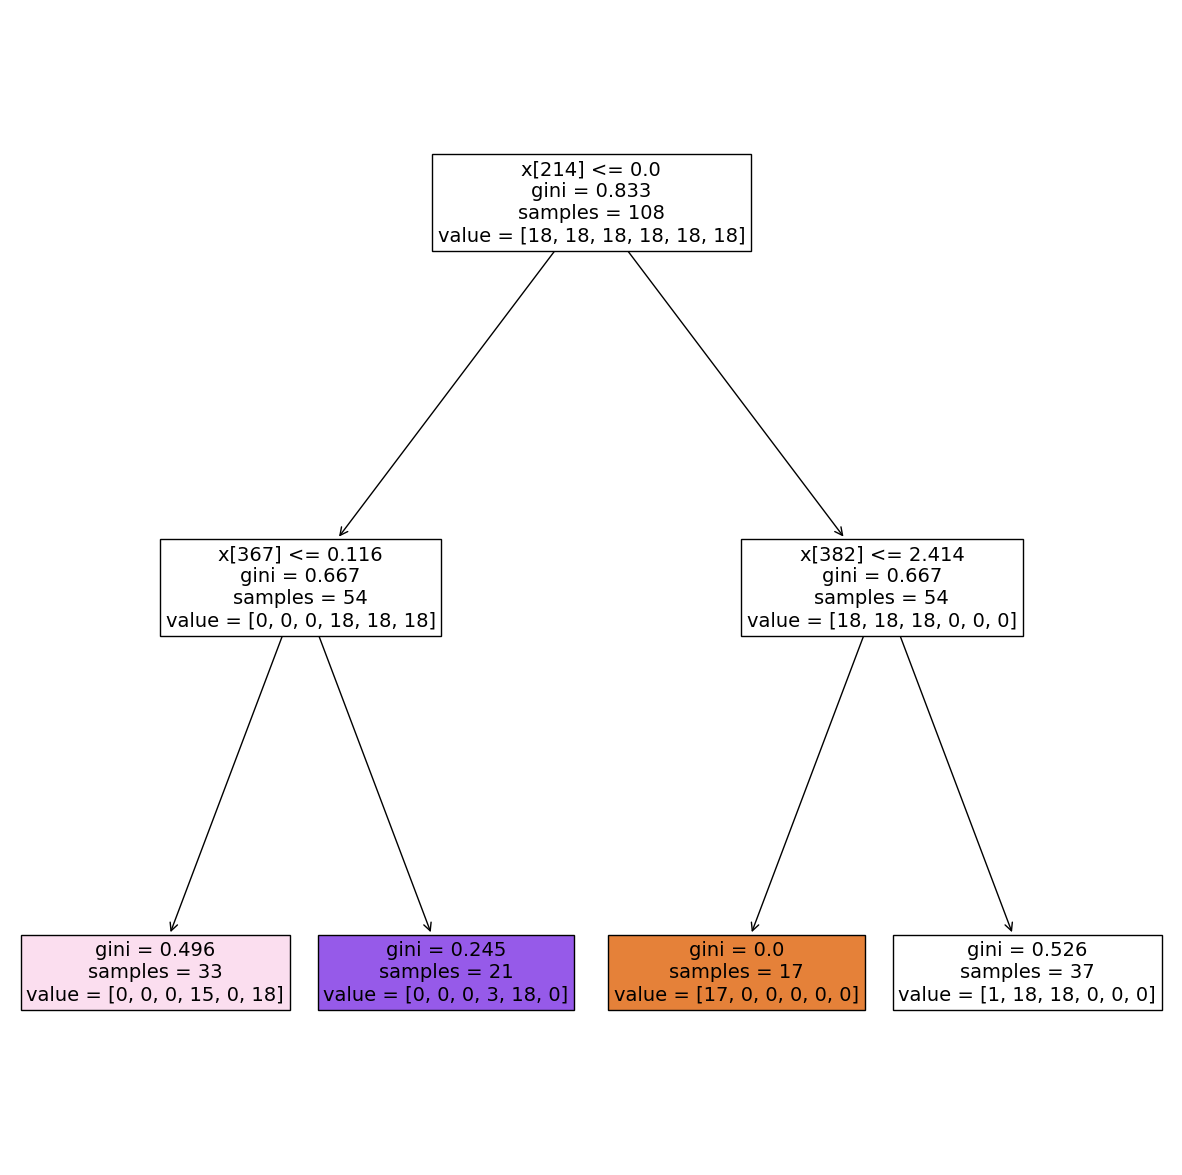

In [ ]:
dt_tsfel2 = DecisionTreeClassifier(max_depth=2)
dt_tsfel2.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(15,15))
plot_tree(dt_tsfel2, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel2.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel2.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.5277777777777778
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  0  0  1 11]
 [ 0  0  0  0  9  3]
 [ 2  0  0  0  0 10]]


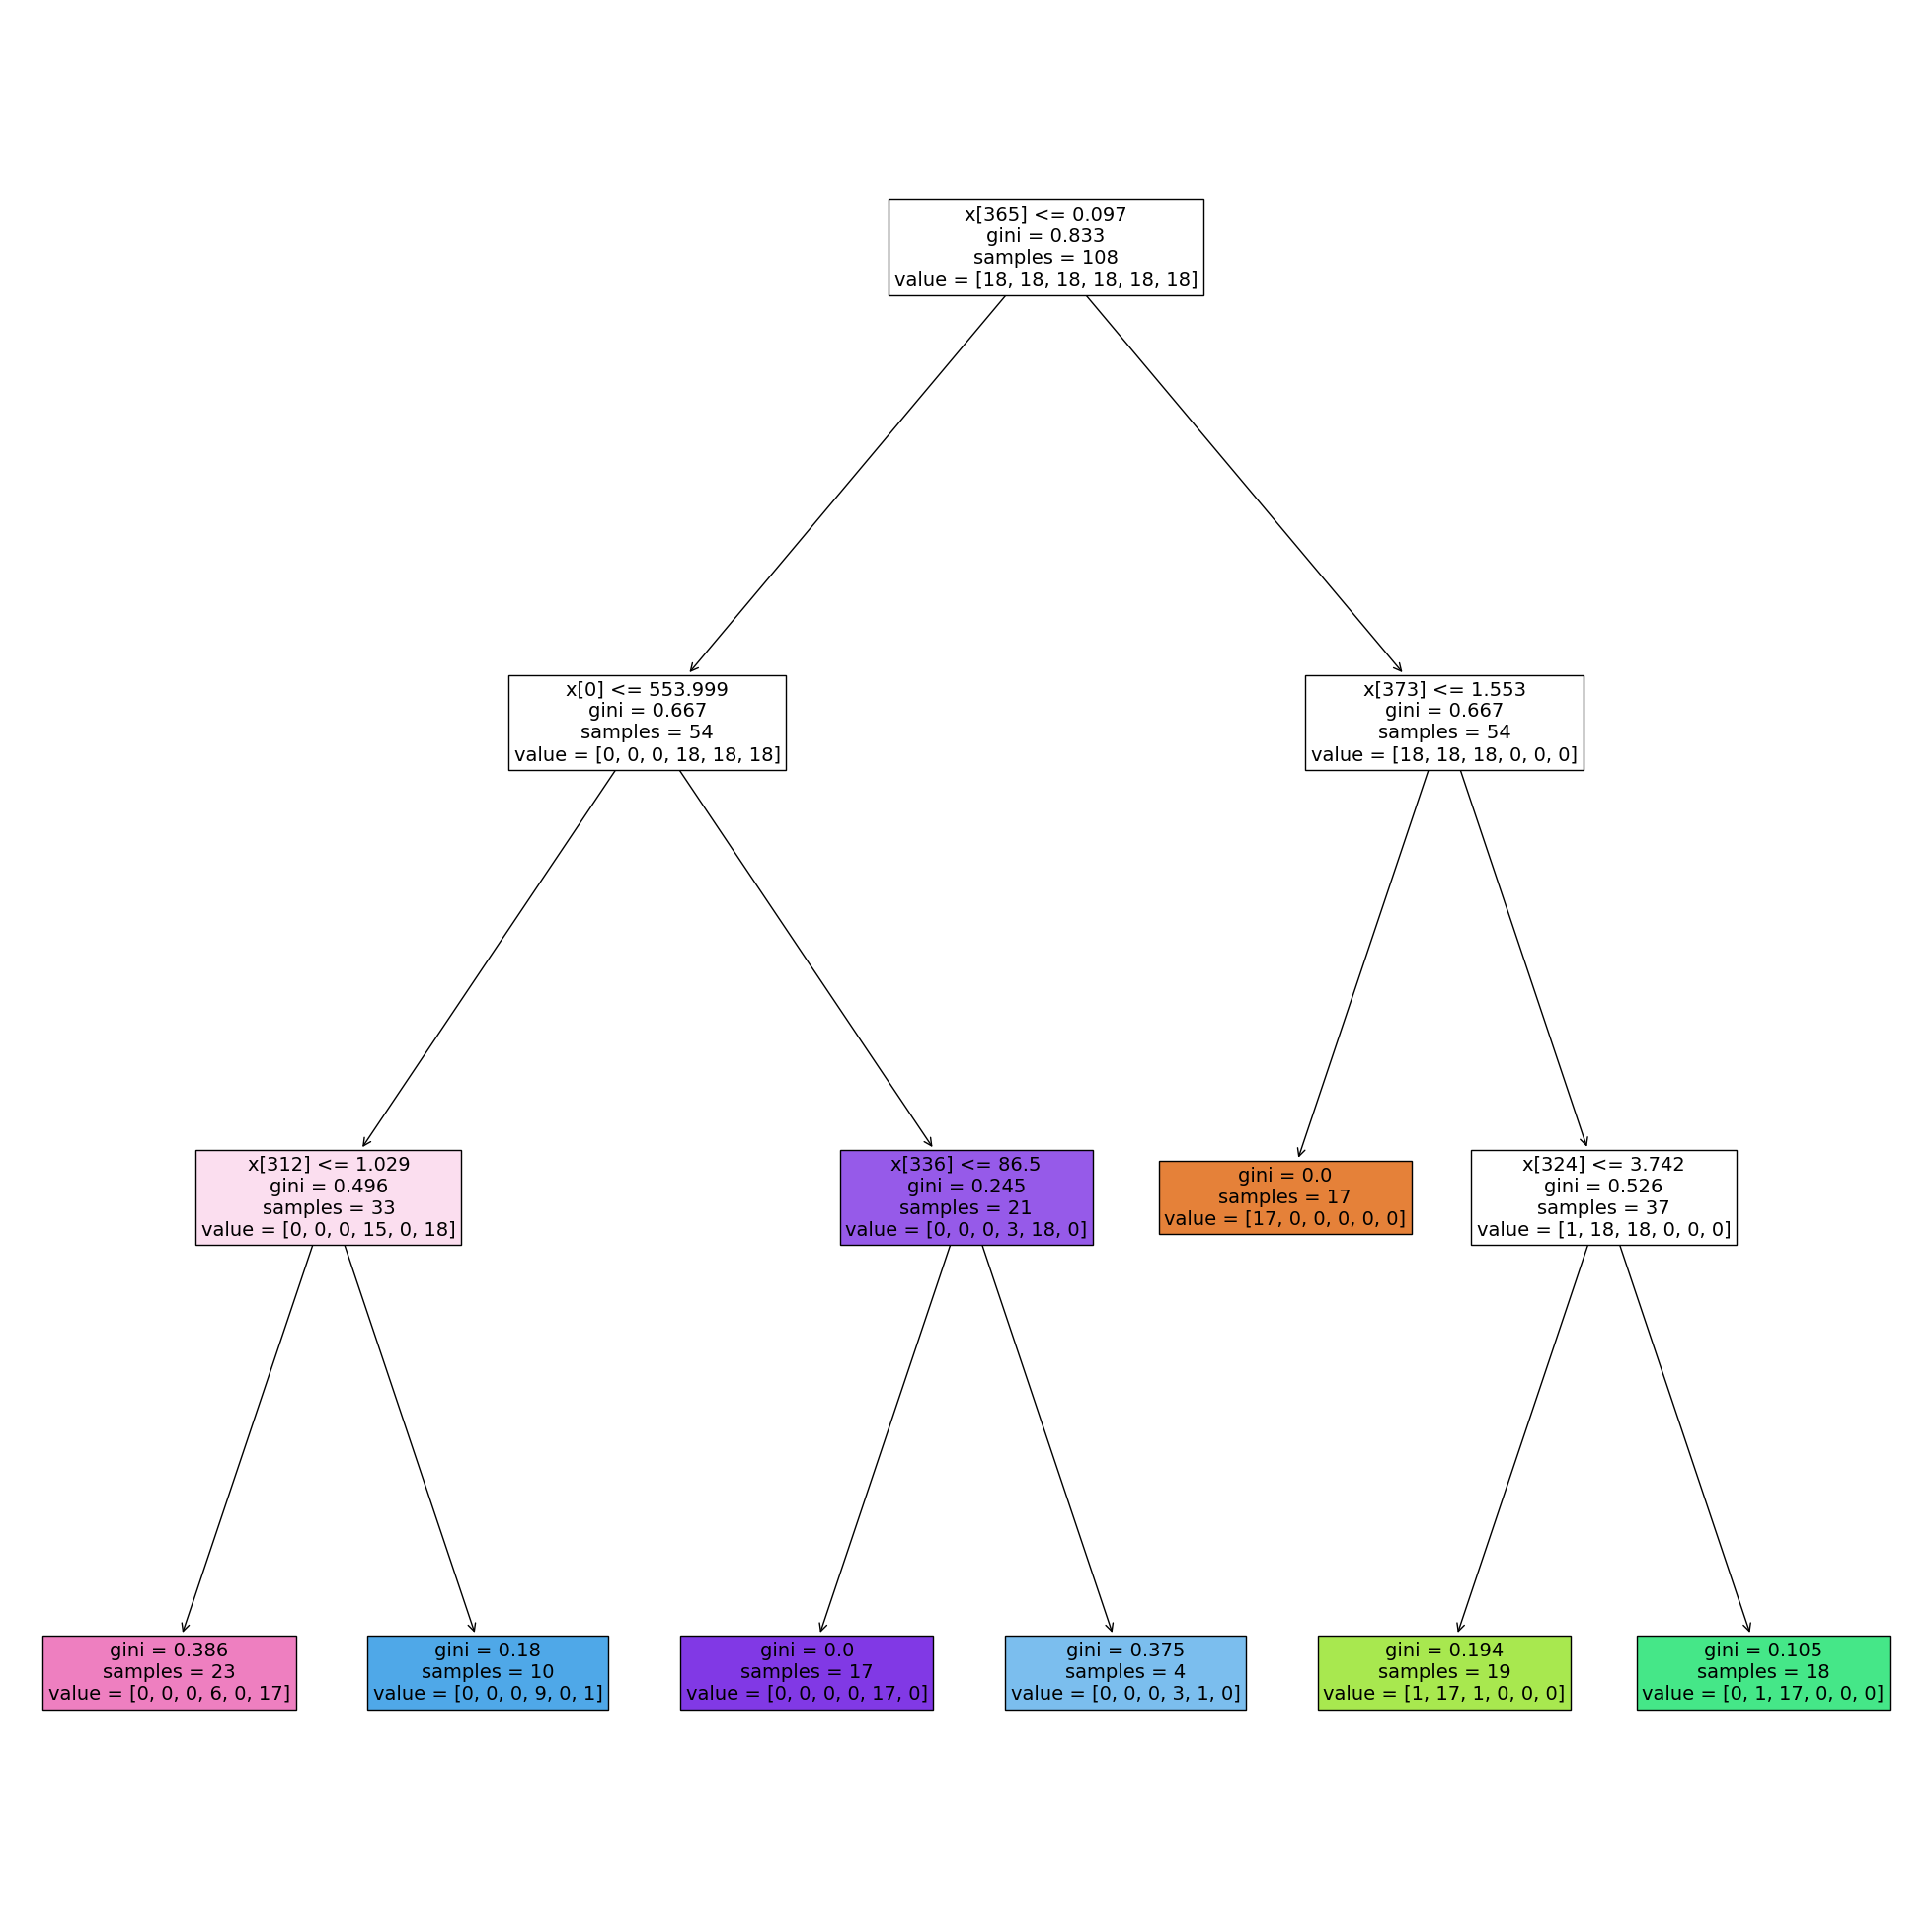

In [ ]:
dt_tsfel3 = DecisionTreeClassifier(max_depth=3)
dt_tsfel3.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(25,25))
plot_tree(dt_tsfel3, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel3.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel3.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.75
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  3  9  0  0  0]
 [ 0  0  0  4  1  7]
 [ 0  0  0  0 12  0]
 [ 0  0  0  2  0 10]]


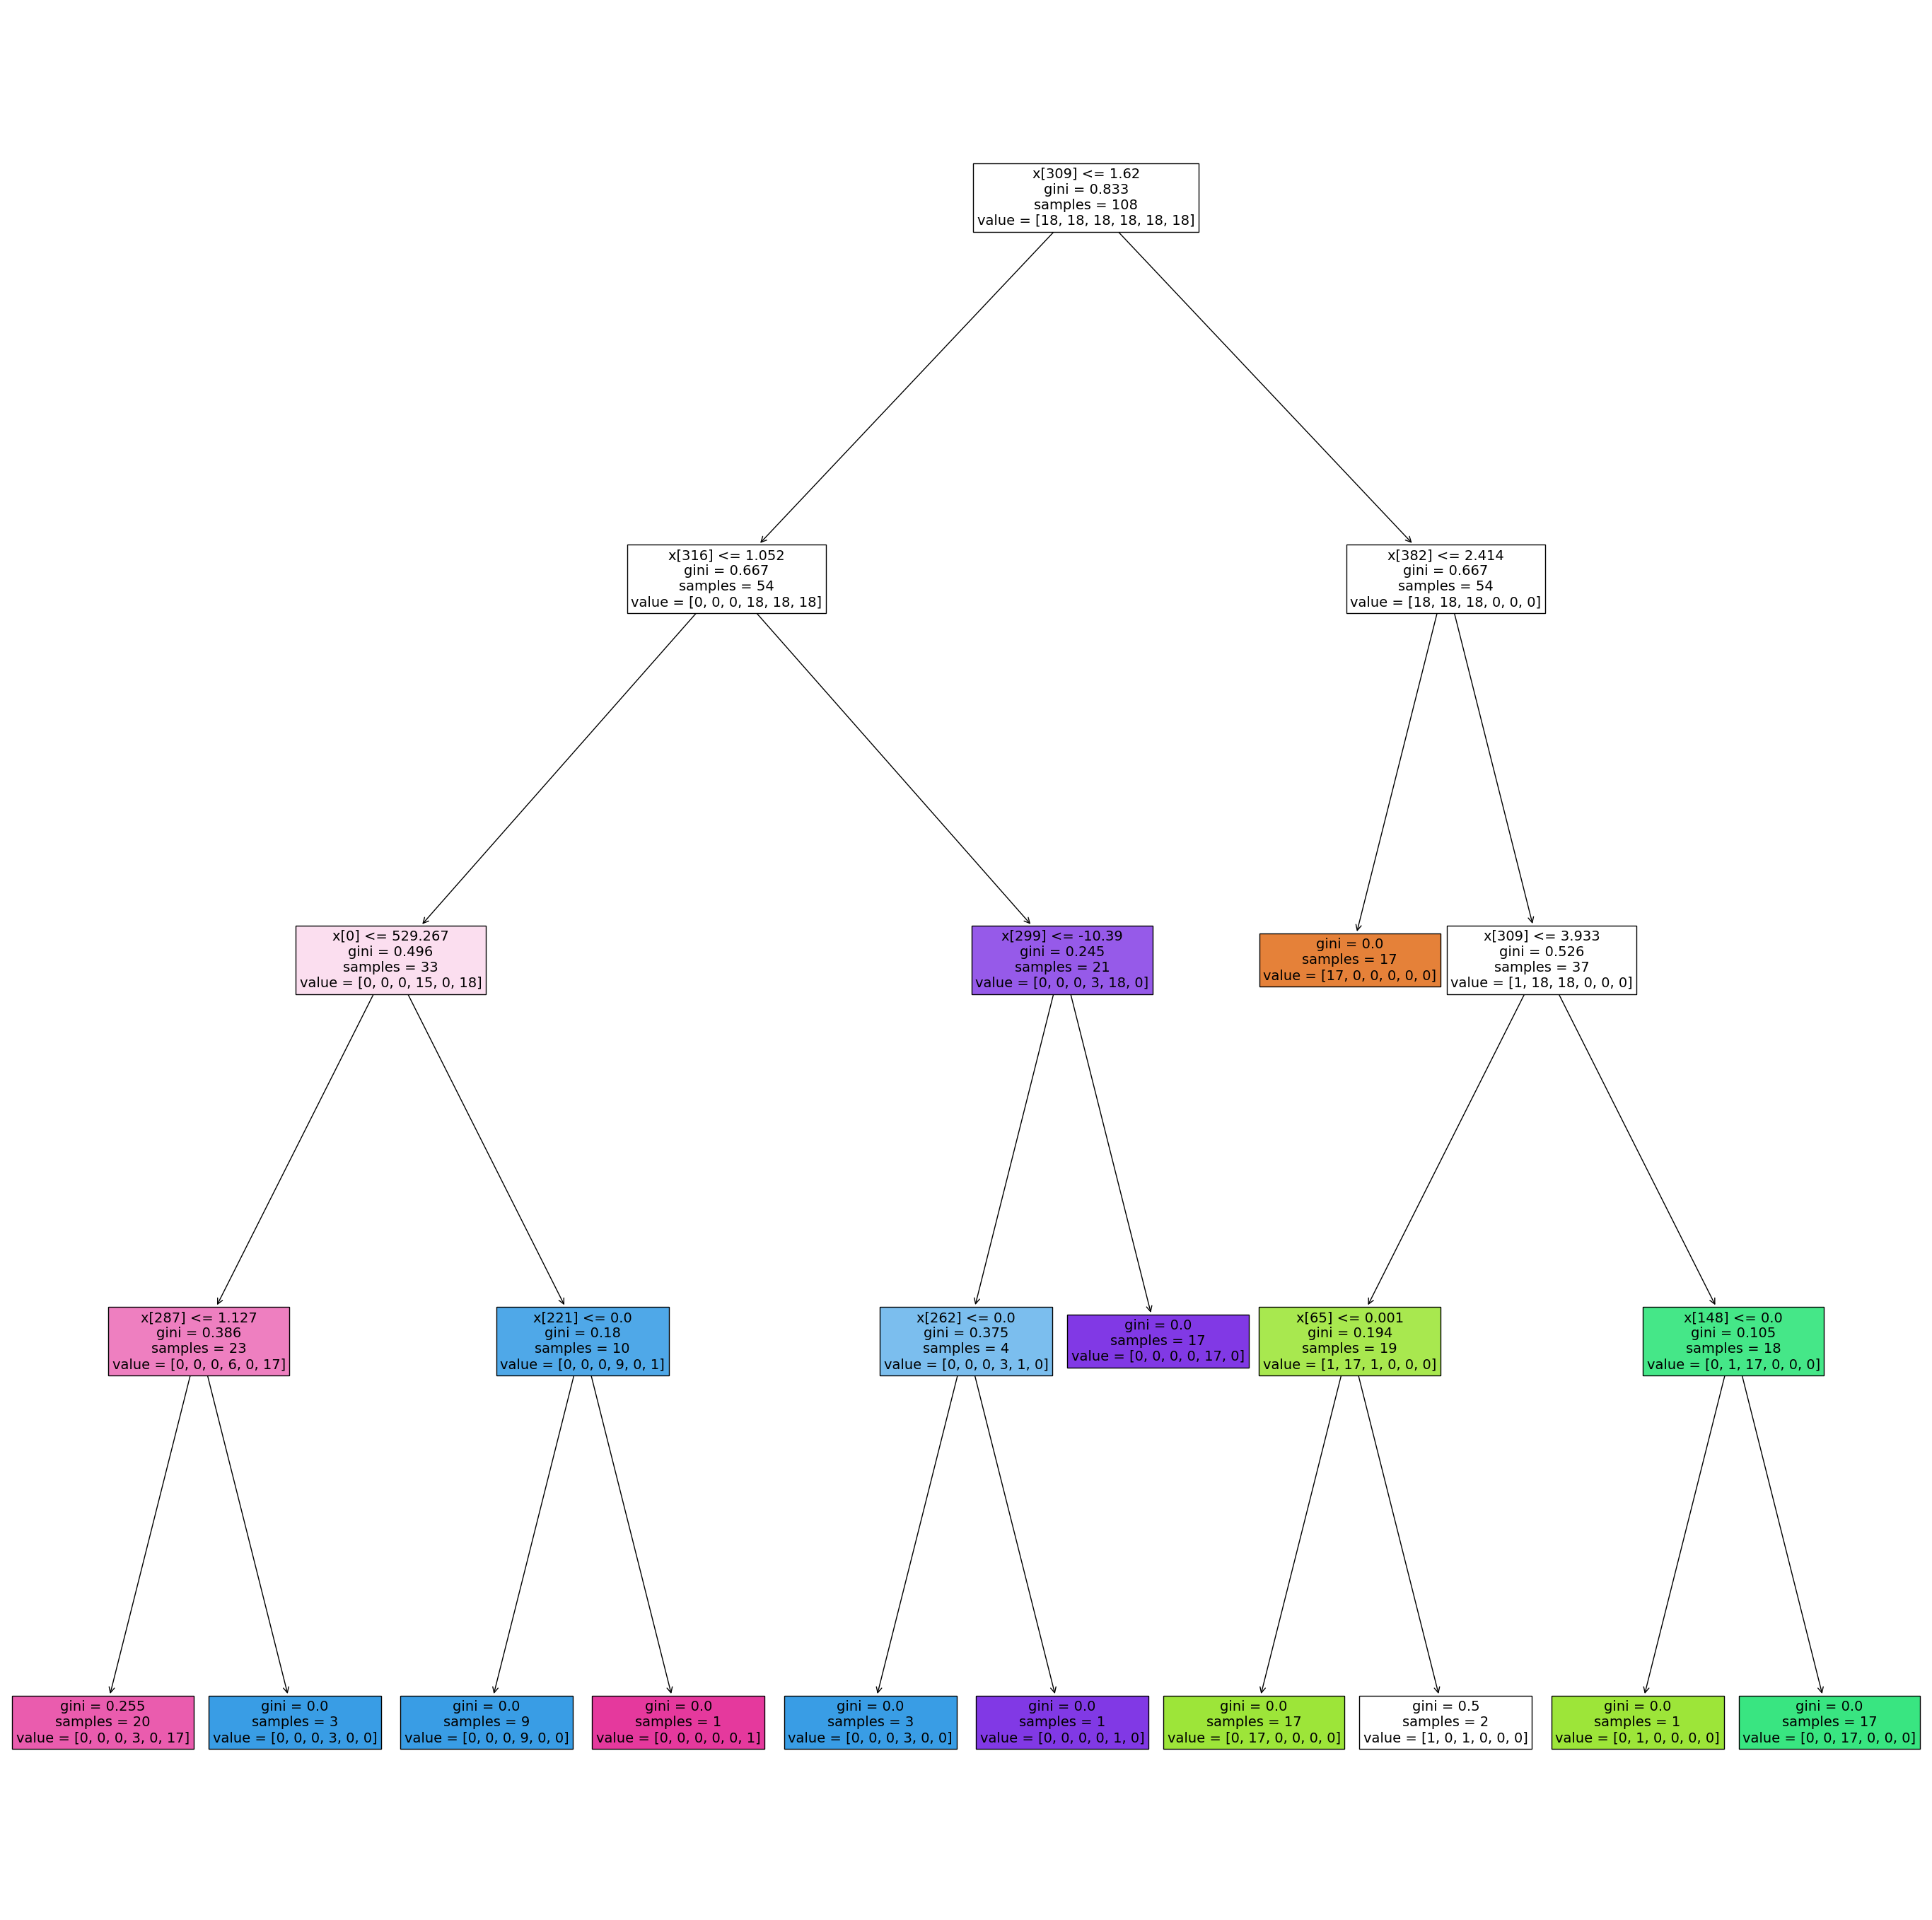

In [ ]:
dt_tsfel4 = DecisionTreeClassifier(max_depth=4)
dt_tsfel4.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(35,35))
plot_tree(dt_tsfel4, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel4.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel4.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.7083333333333334
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  3  9  0  0  0]
 [ 0  0  0  6  0  6]
 [ 0  0  0  4  8  0]
 [ 0  0  0  3  0  9]]


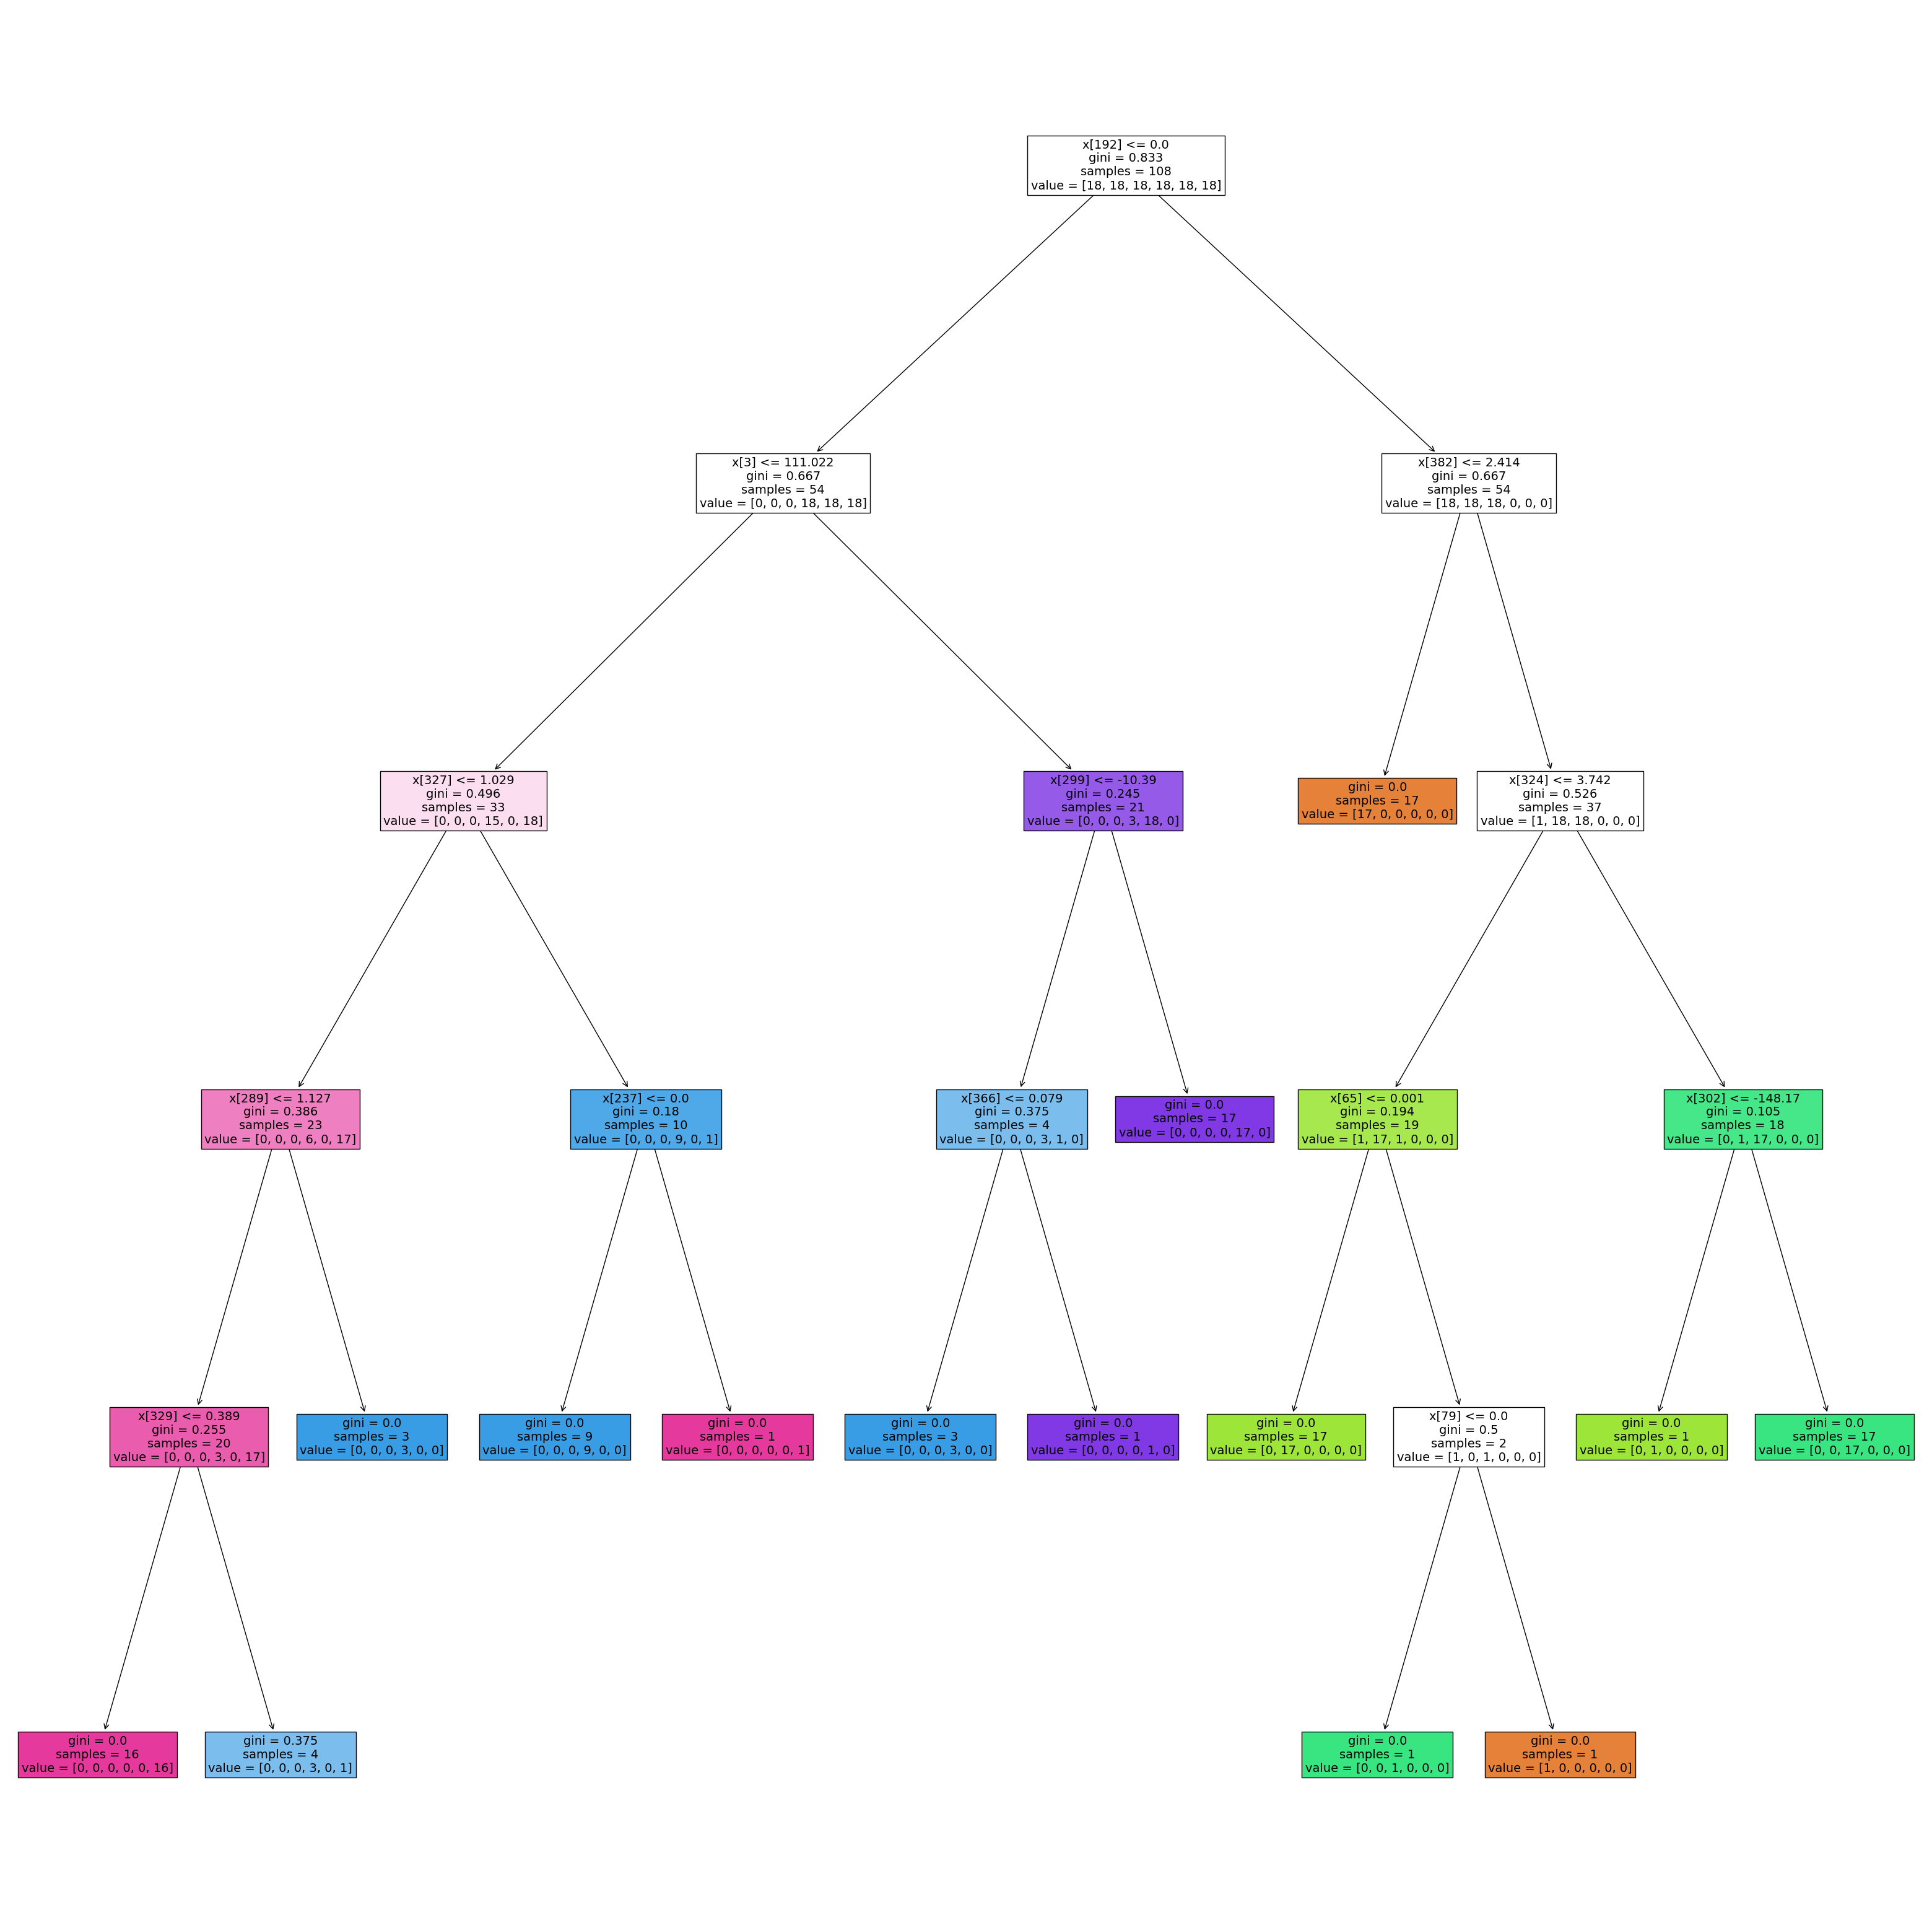

In [ ]:
dt_tsfel5 = DecisionTreeClassifier(max_depth=5)
dt_tsfel5.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(40,40))
plot_tree(dt_tsfel5, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel5.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel5.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.7083333333333334
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  3  9  0  0  0]
 [ 0  0  0  7  1  4]
 [ 0  0  0  4  8  0]
 [ 0  0  0  4  0  8]]


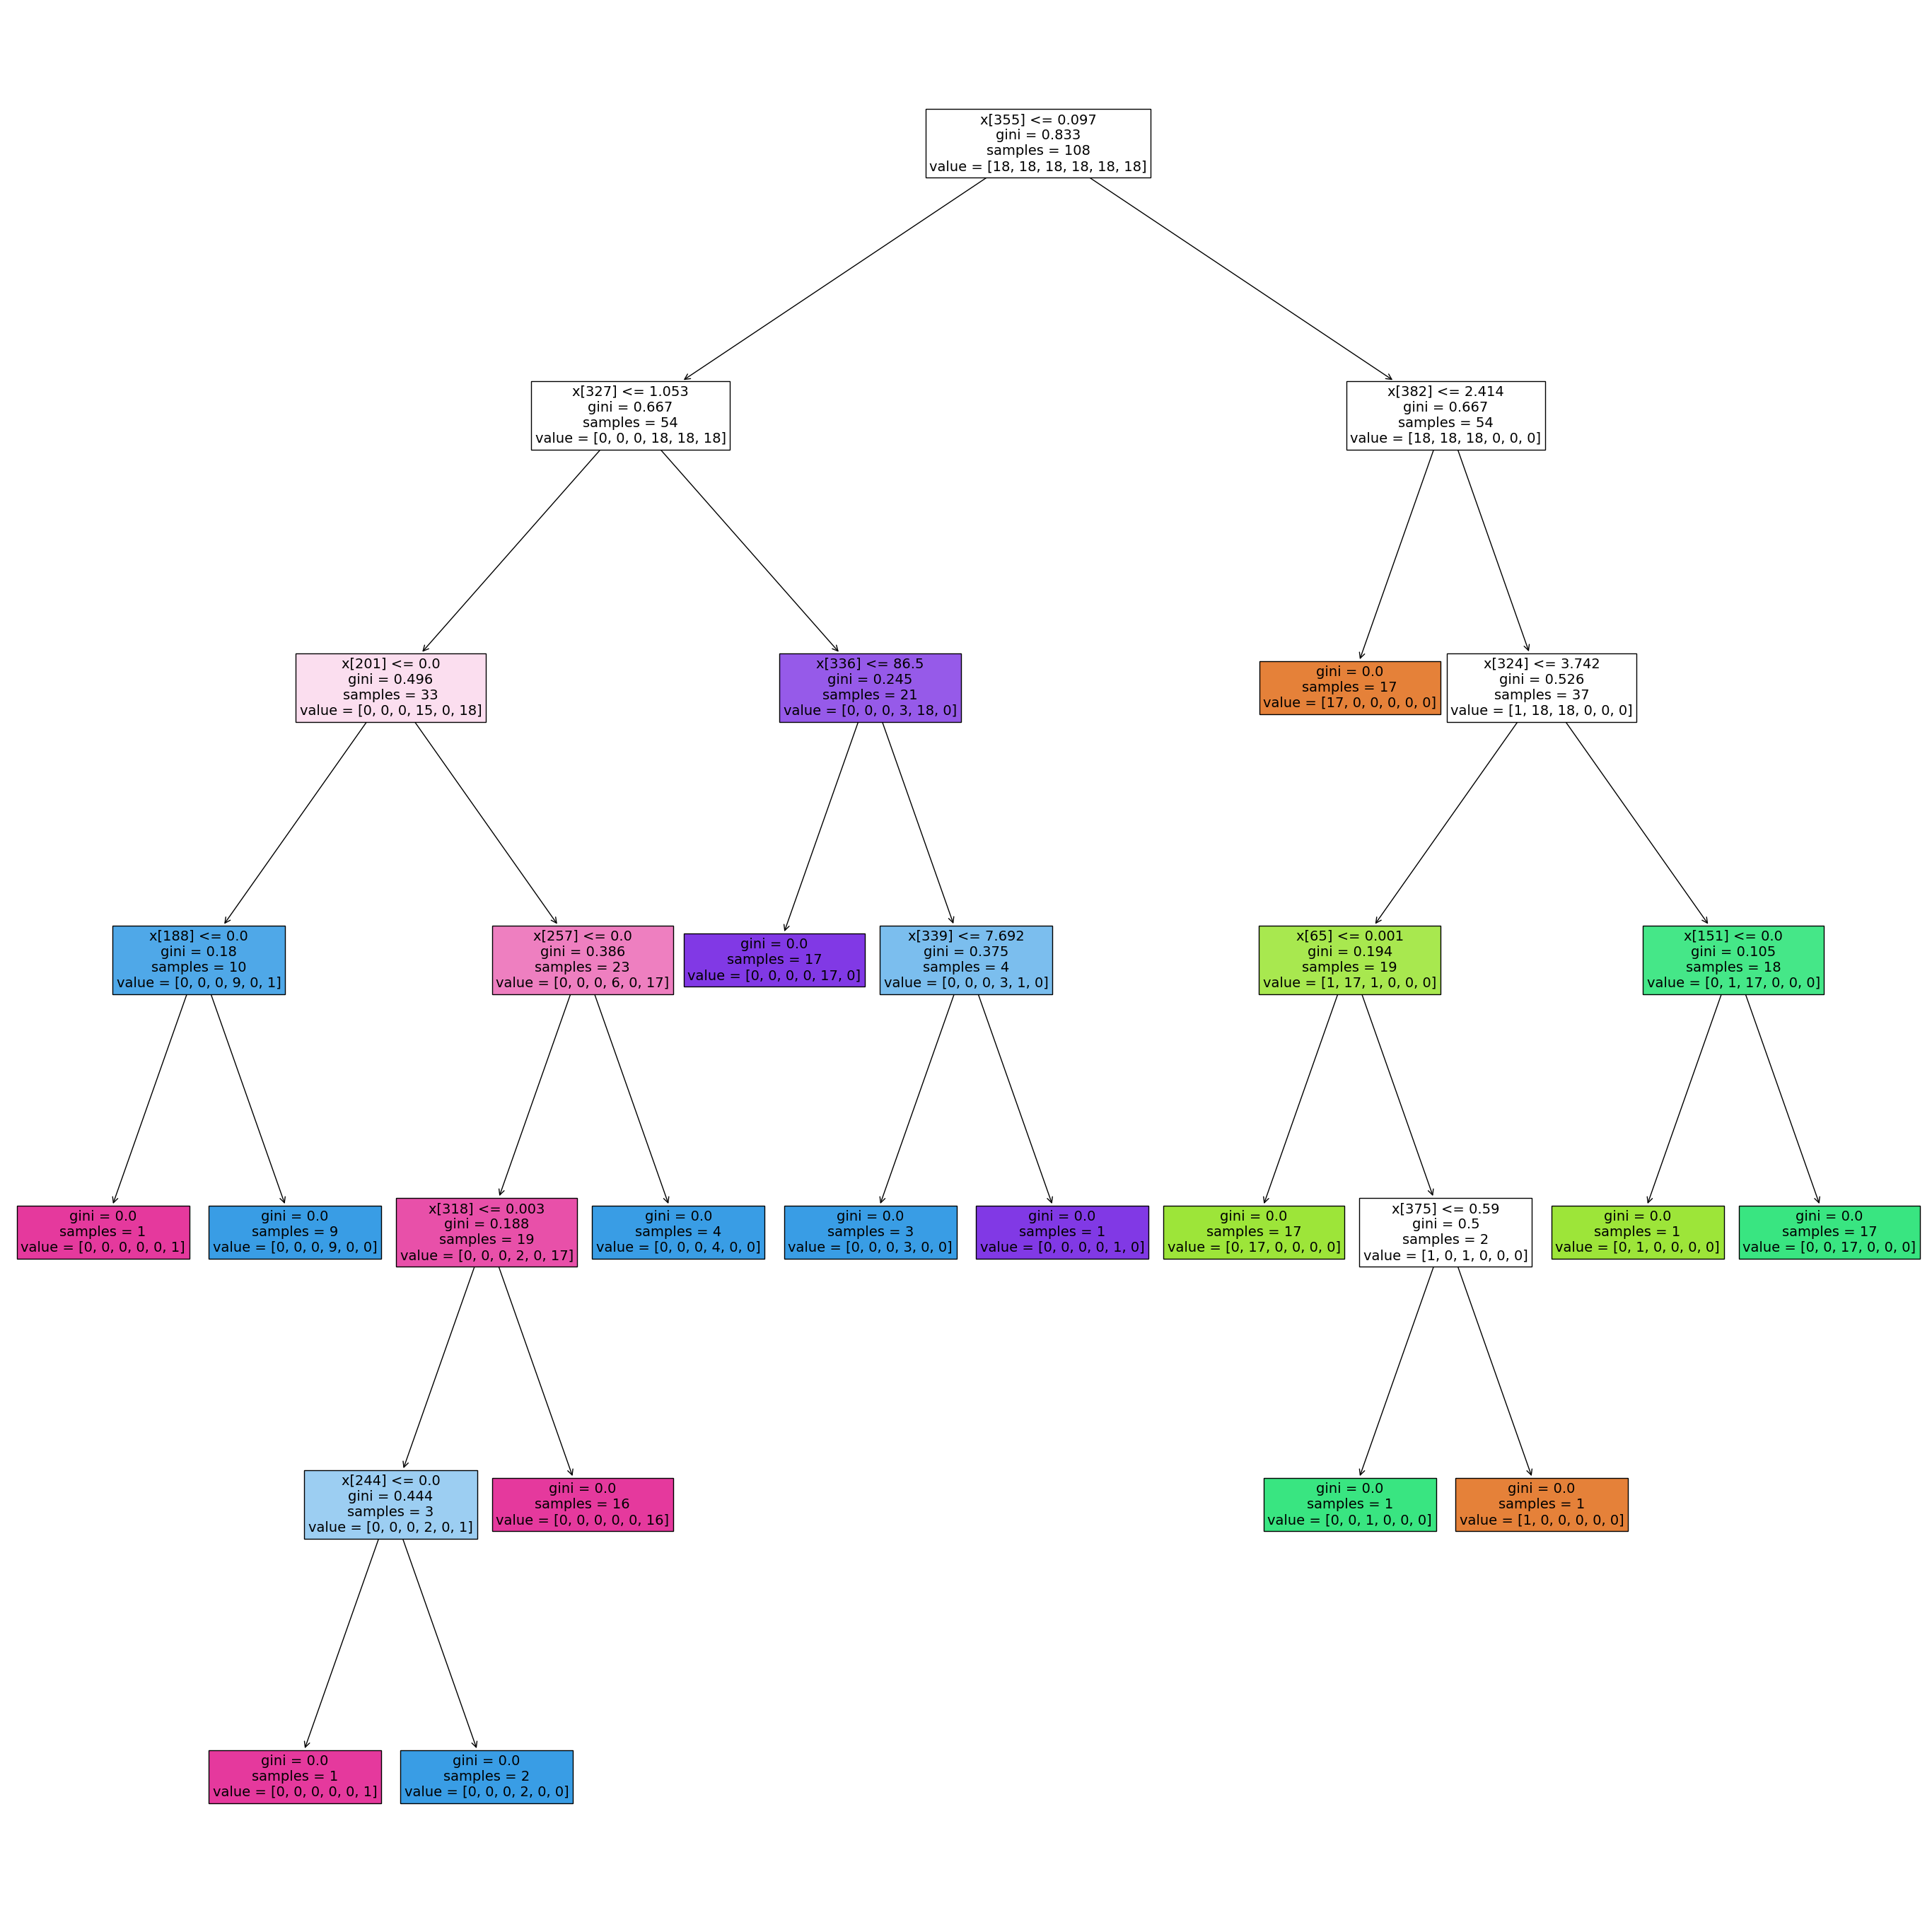

In [ ]:
dt_tsfel6 = DecisionTreeClassifier(max_depth=6)
dt_tsfel6.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(35,35))
plot_tree(dt_tsfel6, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel6.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel6.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.75
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  3  9  0  0  0]
 [ 0  0  0 10  1  1]
 [ 0  0  0  0 12  0]
 [ 0  0  0  8  0  4]]


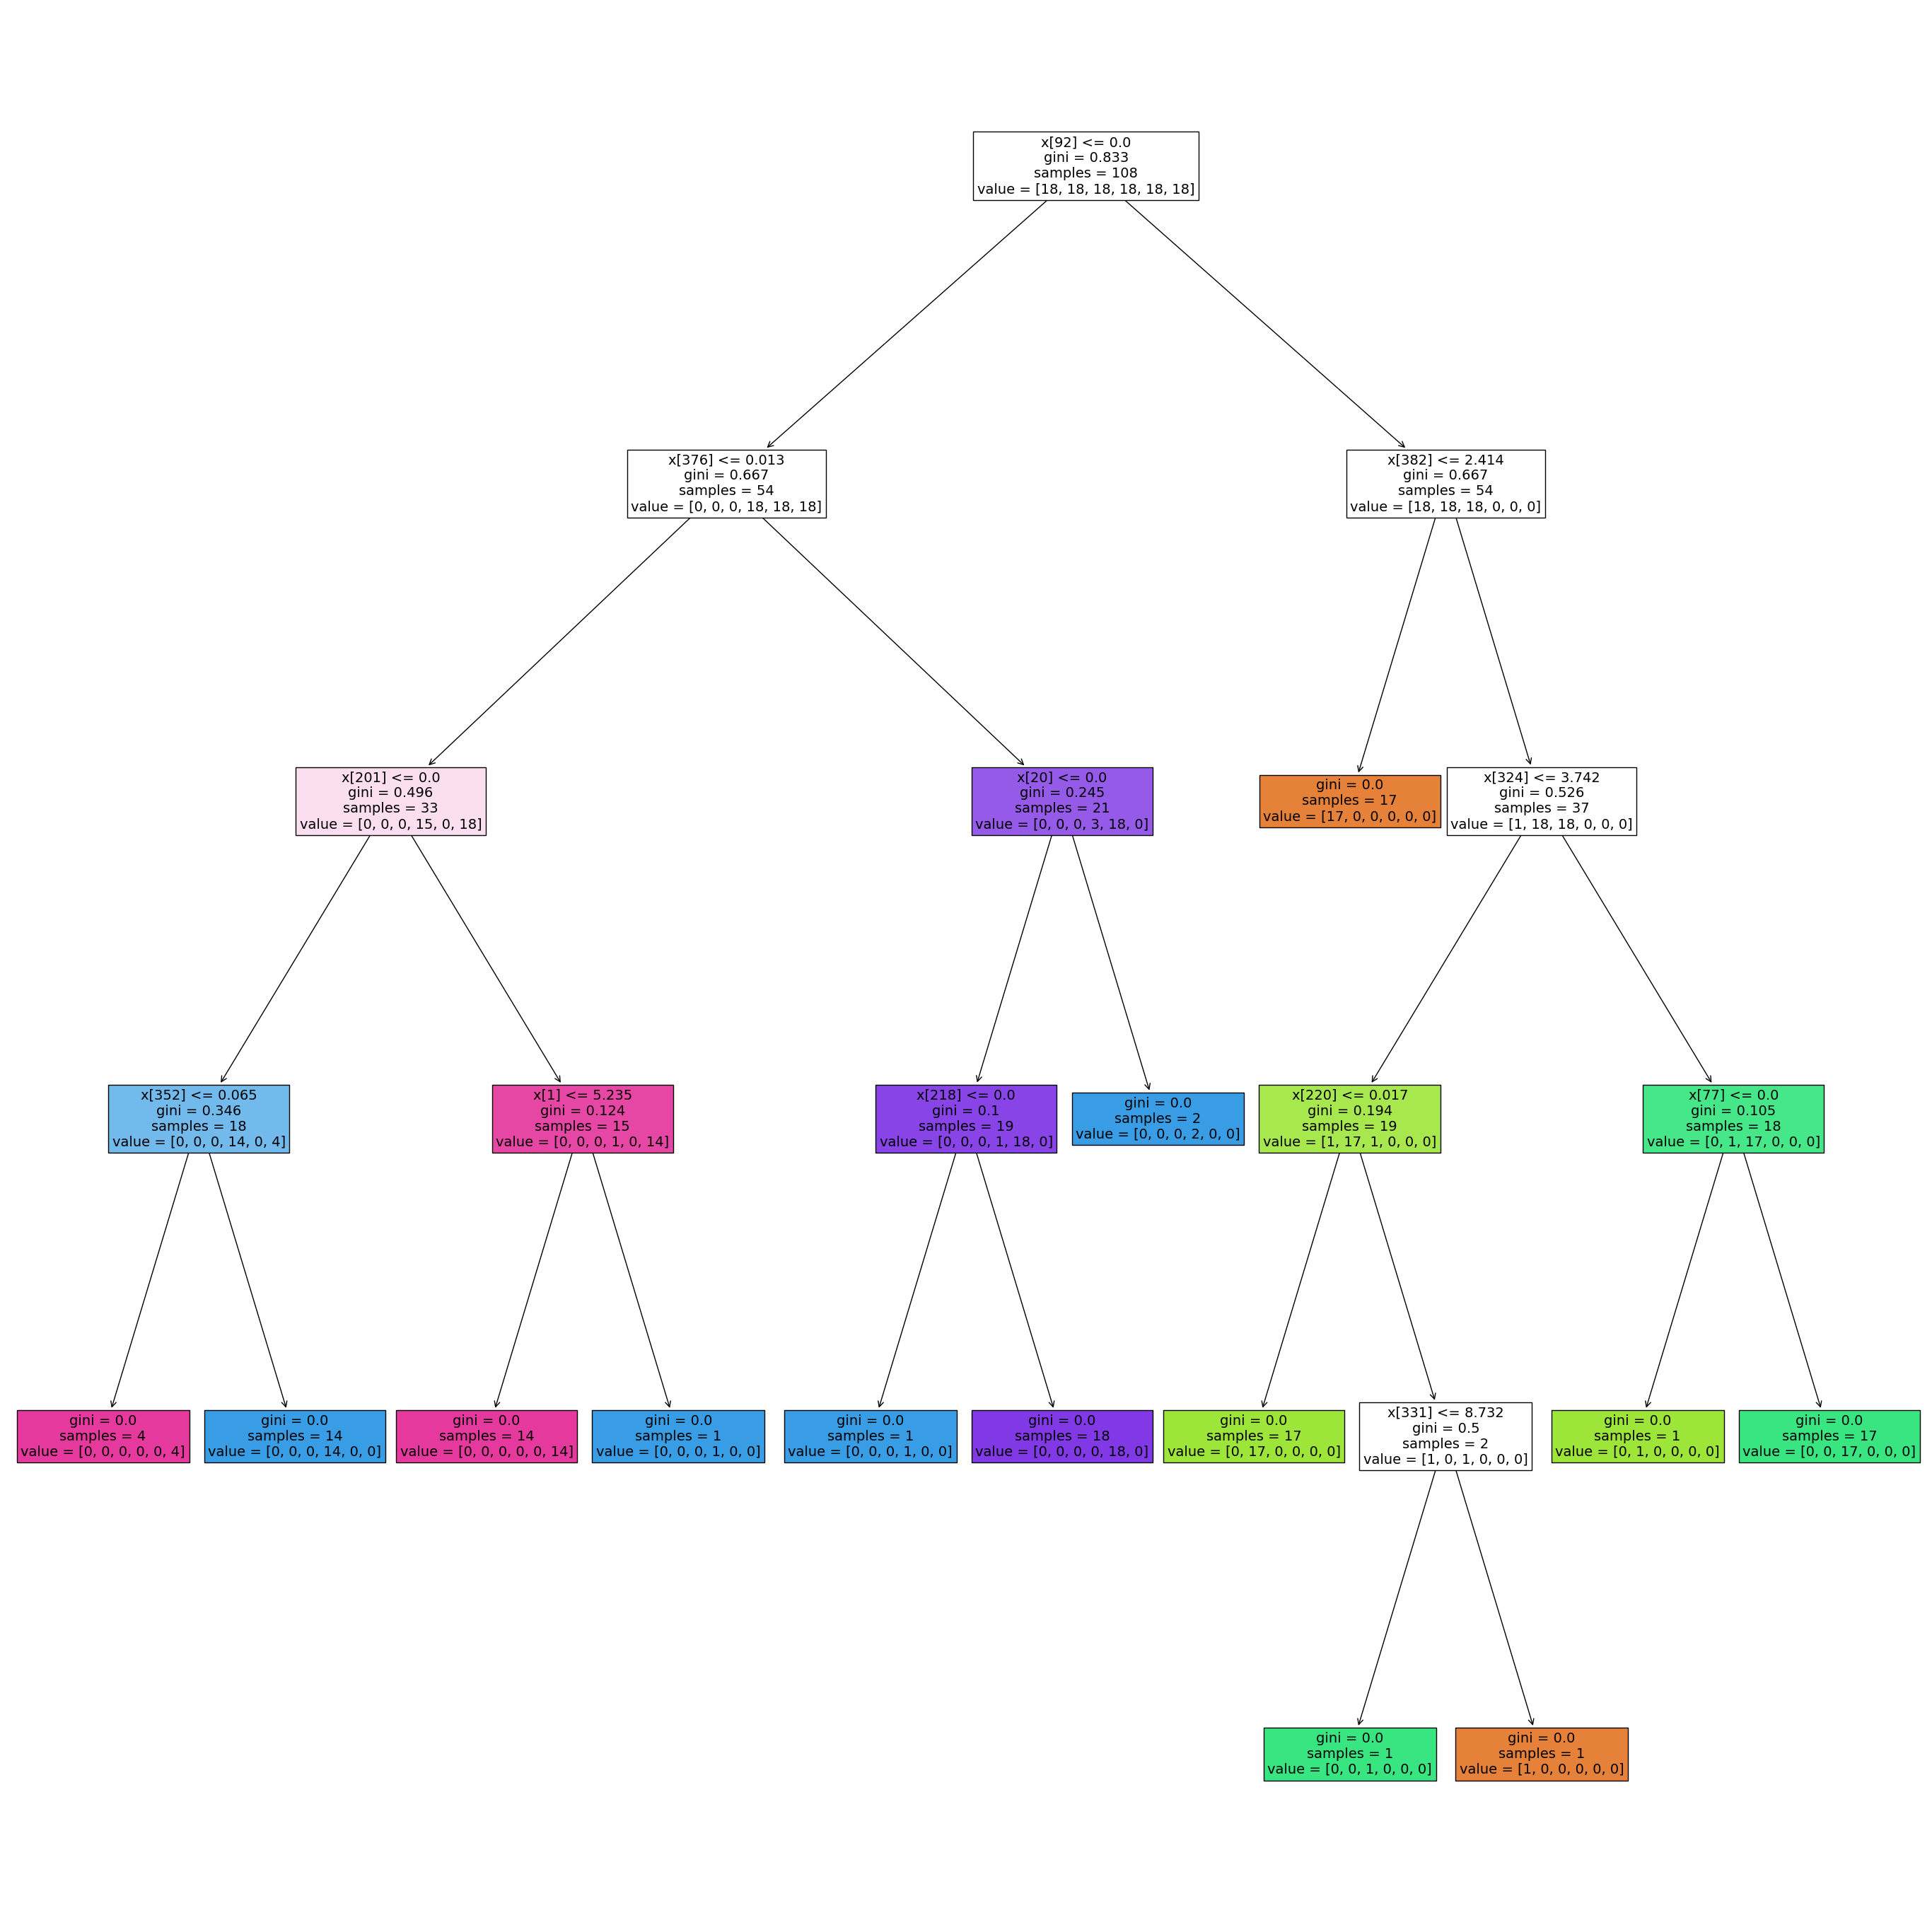

In [ ]:
dt_tsfel7 = DecisionTreeClassifier(max_depth=7)
dt_tsfel7.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(35,35))
plot_tree(dt_tsfel7, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel7.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel7.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.6805555555555556
Confusion Matrix:
 [[9 3 0 0 0 0]
 [2 9 1 0 0 0]
 [0 3 9 0 0 0]
 [0 0 0 8 1 3]
 [0 0 0 5 7 0]
 [0 0 0 4 1 7]]


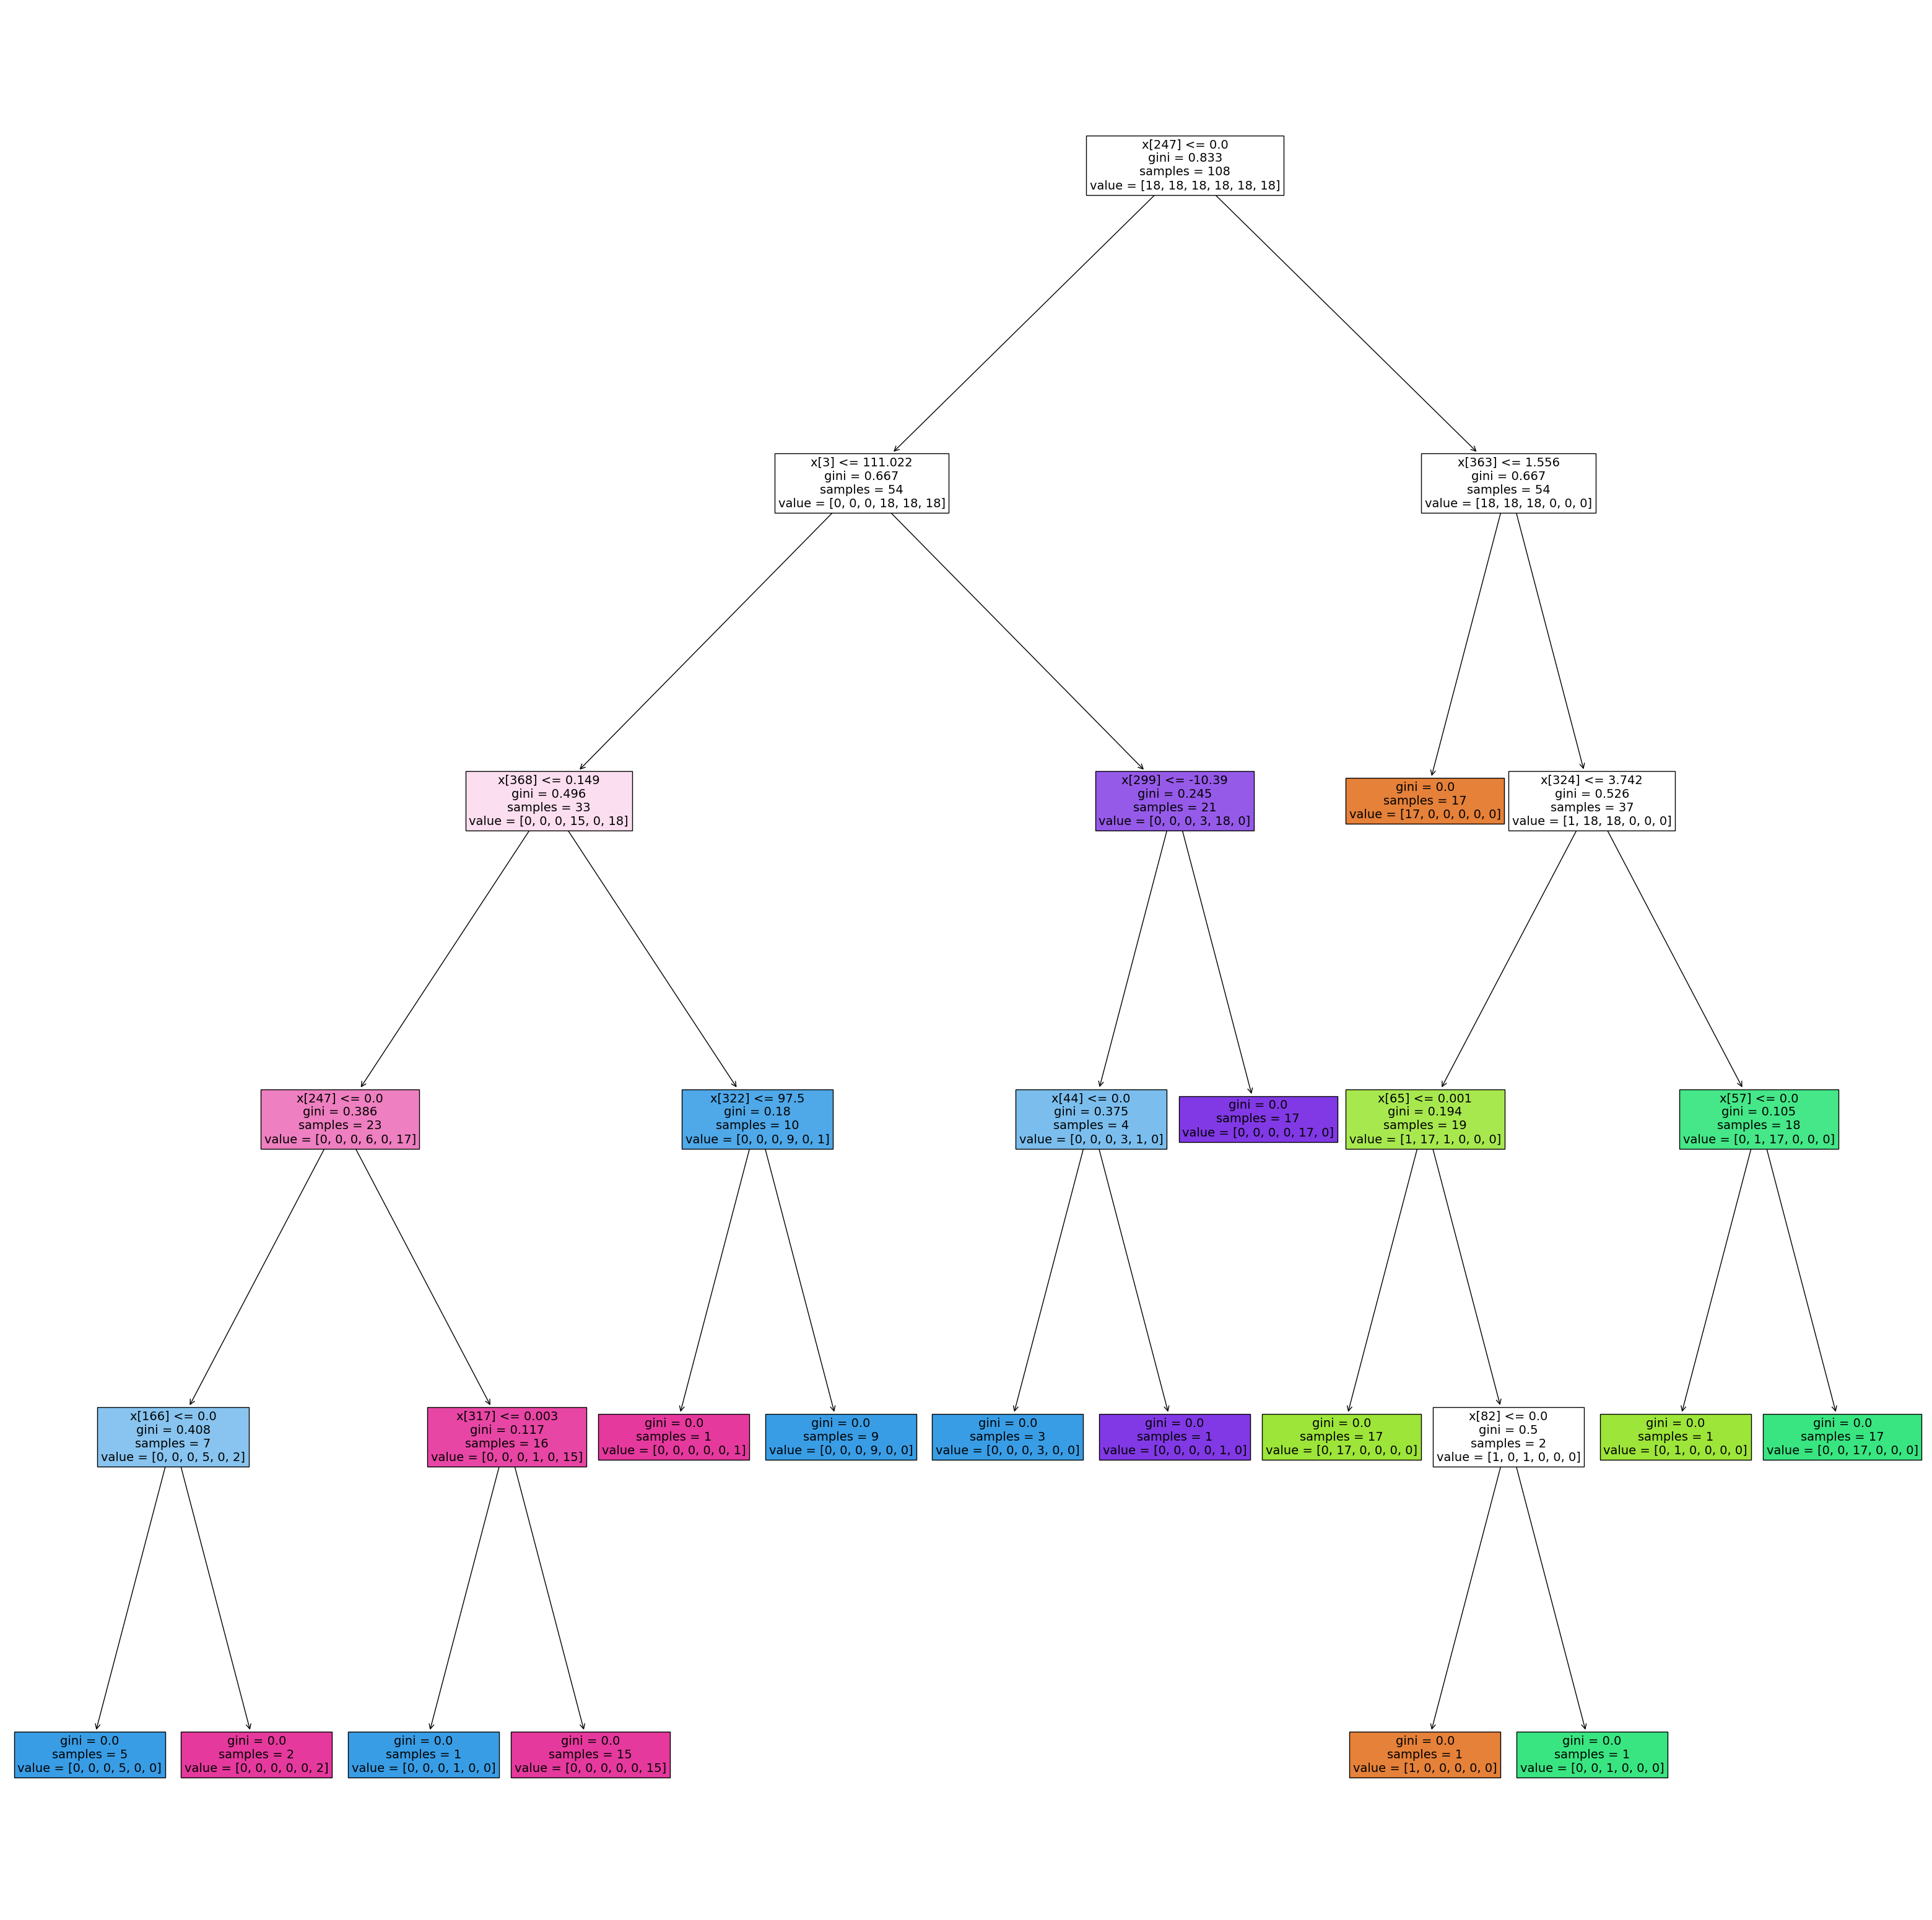

In [ ]:
dt_tsfel8 = DecisionTreeClassifier(max_depth=8)
dt_tsfel8.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(40,40))
plot_tree(dt_tsfel8, filled=True, fontsize=14)
plt.savefig("./Figures/Decision-Trees/varying-depth_tsfel8.pdf")
plt.show()

In [ ]:
yPred_tsfel = dt_tsfel8.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))

Accuracy Score: 0.7083333333333334
Confusion Matrix:
 [[ 9  3  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  4  8  0  0  0]
 [ 0  0  0  6  0  6]
 [ 0  0  0  0 12  0]
 [ 0  0  0  6  0  6]]


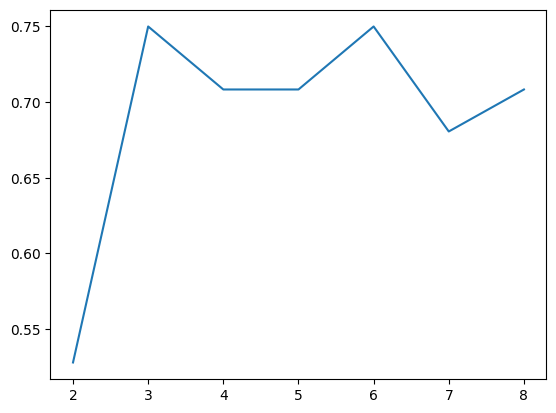

In [ ]:
plt.plot(range(2,9), accuracy_values_tsfel)
plt.savefig("./Figures/Decision-Trees/accuracy-vs-depth_tsfel.pdf")

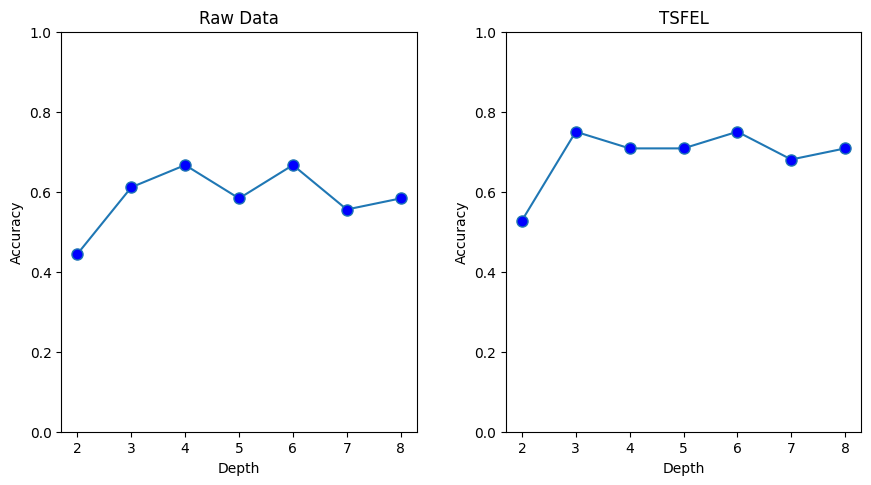

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (8,4))

axis[0].plot(range(2,9), accuracy_values, marker='o', markerfacecolor='blue', markersize=8)
axis[0].set_title("Raw Data")
axis[0].set_xlabel("Depth")
axis[0].set_ylabel("Accuracy")
axis[0].set_ylim(0, 1)
axis[1].set_ylim(0, 1)
axis[1].plot(range(2,9), accuracy_values_tsfel, marker='o', markerfacecolor='blue', markersize=8)
axis[1].set_title("TSFEL")
axis[1].set_xlabel("Depth")
axis[1].set_ylabel("Accuracy")

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.25, 
                    hspace=0.25)

plt.savefig("./Figures/Decision-Trees/accuracy-comparison-raw-vs-TSFEL.pdf")

### Q7. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

### Ans. Reasoning 1 mark

## Deployment Test

### Raw Data Deployment

In [ ]:
from sklearn.tree import plot_tree
from MakeDataset_deployment import *
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

(180, 500, 3)
(180,)
(30, 500, 3)
(30,)
Training data shape:  (180, 500, 3)
Testing data shape:  (30, 500, 3)


In [ ]:
xtrain = X_train_dep.reshape(180,1500)
ytrain = y_train_dep

print("xTrain Size:", xtrain.shape, "and yTrain Size:", ytrain.shape)

xTrain Size: (180, 1500) and yTrain Size: (180,)


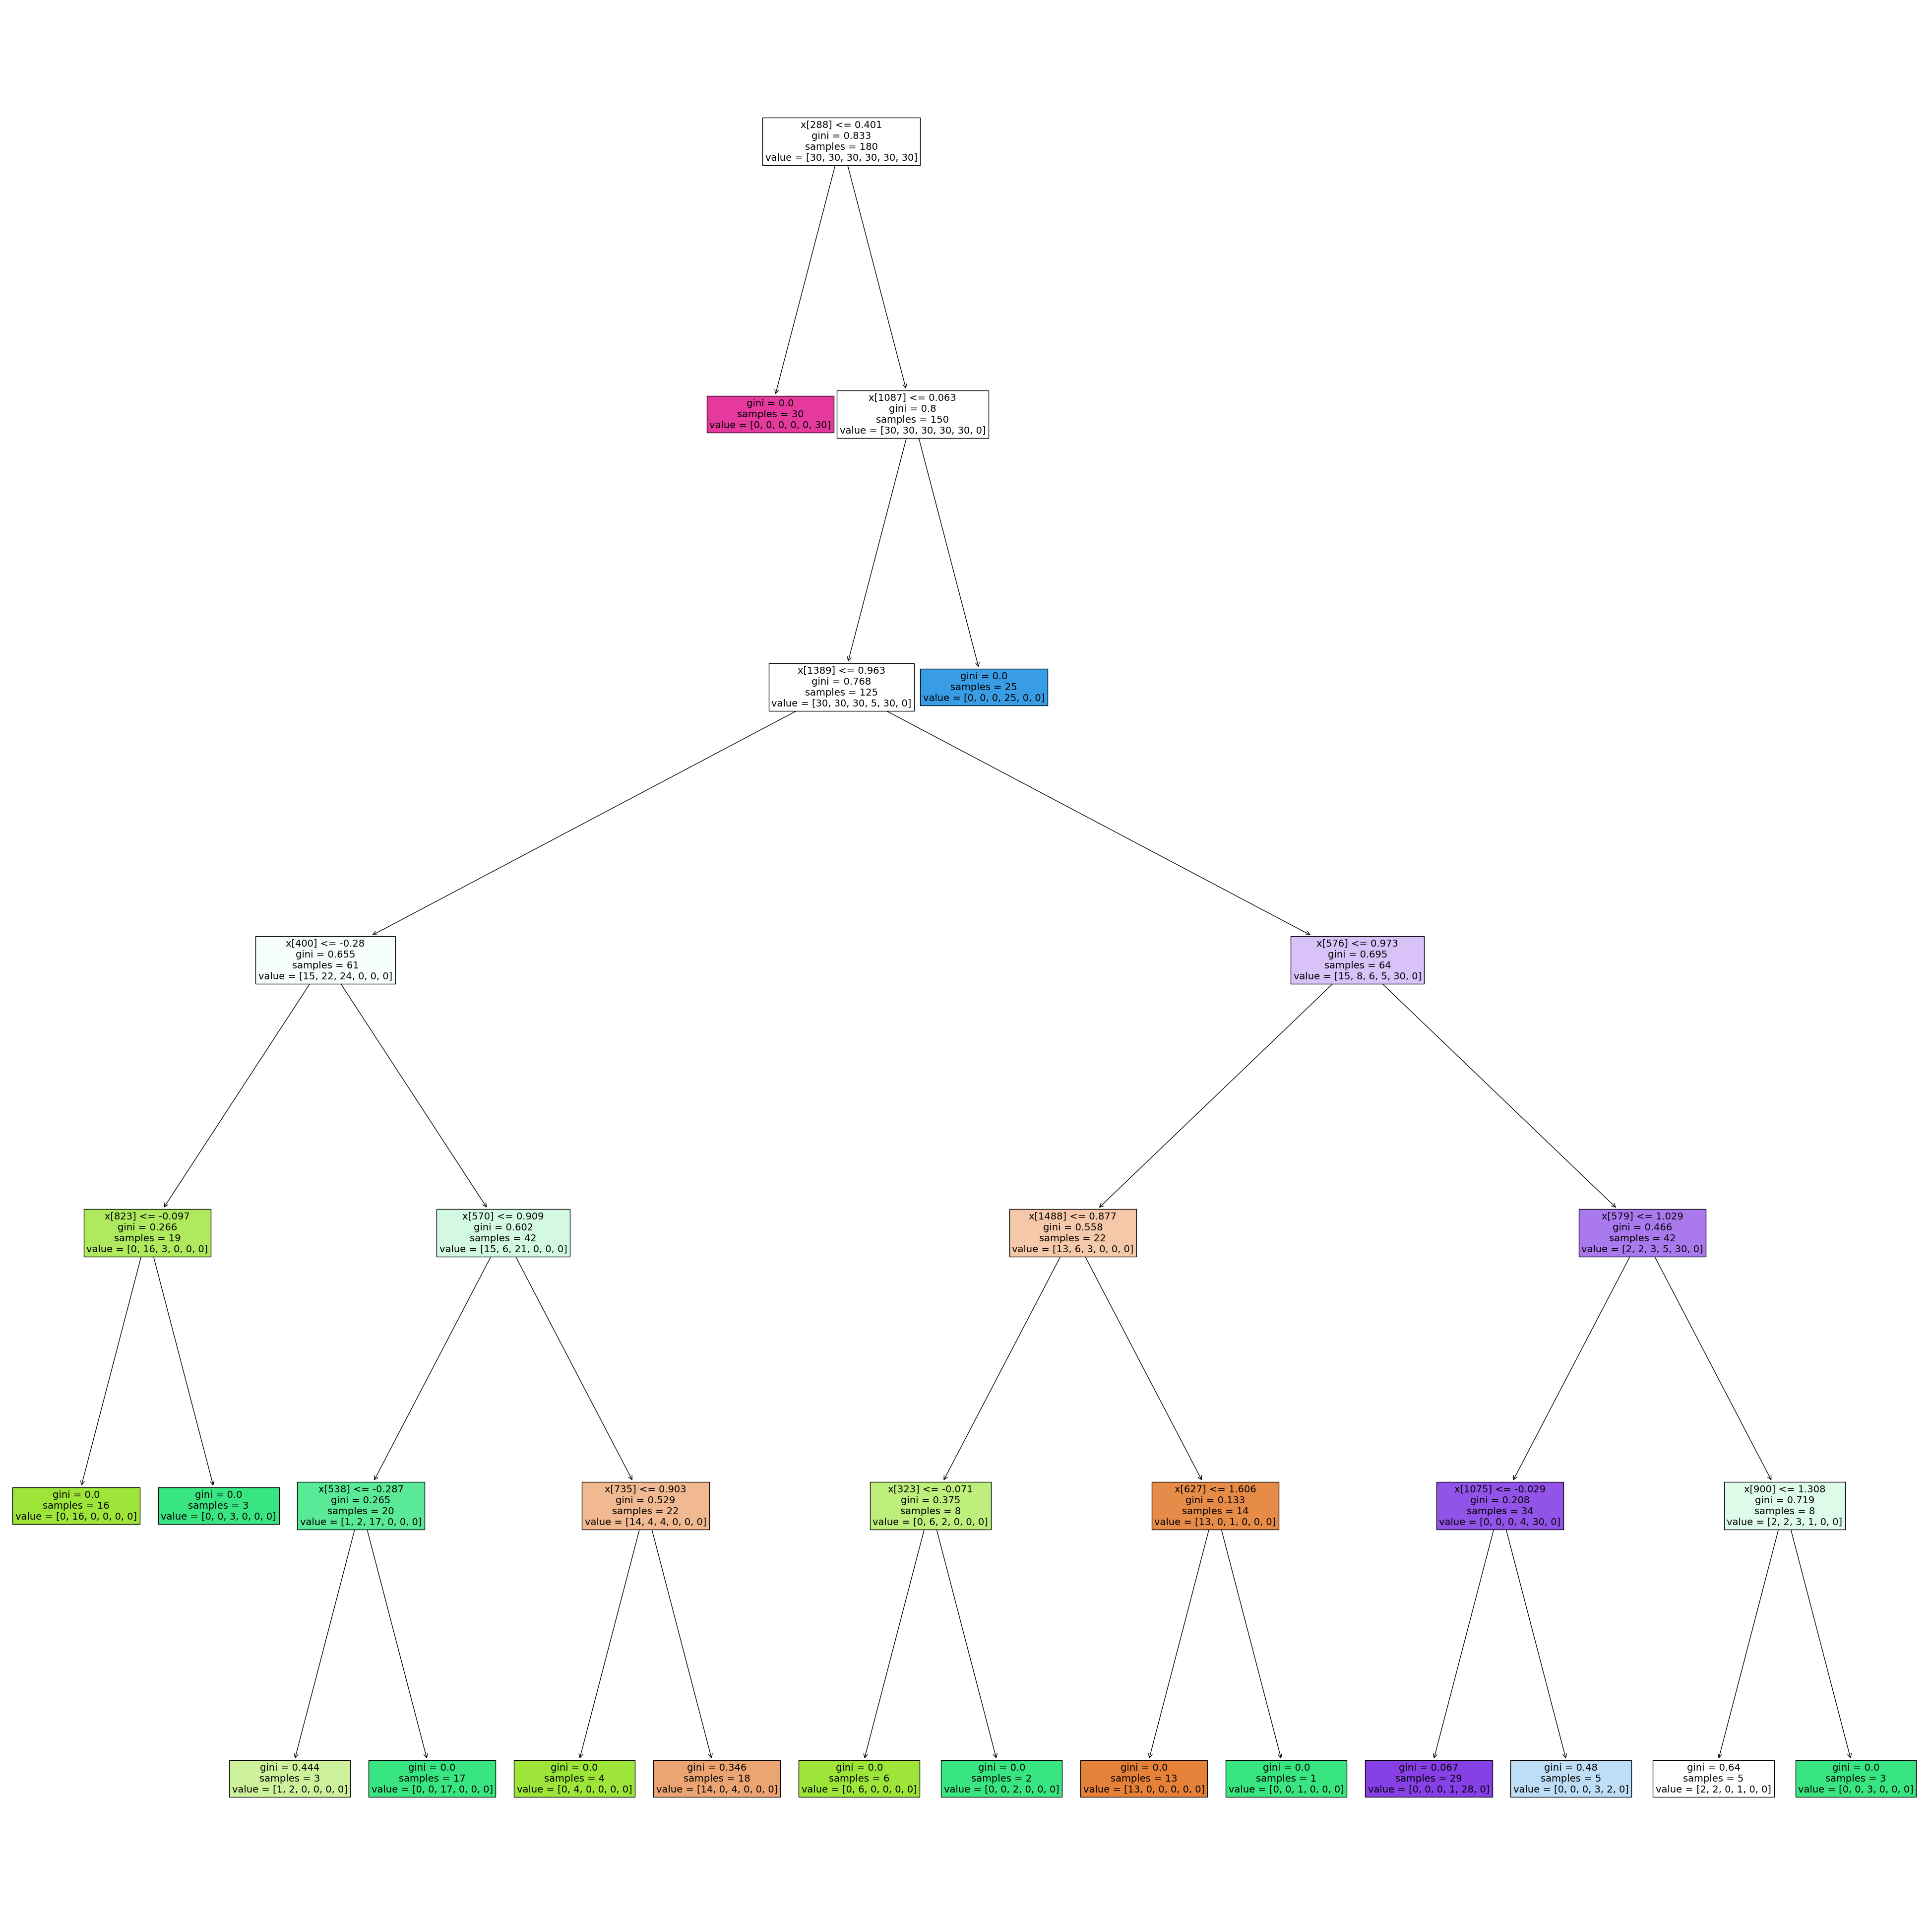

In [ ]:
dt_raw_dep = DecisionTreeClassifier(max_depth=6)
dt_raw_dep.fit(xtrain, ytrain)

plt.figure(figsize=(50,50))
plot_tree(dt_raw_dep, filled=True, fontsize=14)
plt.savefig("./Figures/Deployment/RAW_DecisionTree.pdf")
plt.show()

In [ ]:
yPred_dep = dt_raw_dep.predict(x_test_dep.reshape(30,1500))
print("Accuracy Score:", accuracy_score(y_test_dep, yPred_dep))
print("Confusion Matrix:\n", confusion_matrix(y_test_dep, yPred_dep, labels=[1,2,3,4,5,6]))

Accuracy Score: 0.16666666666666666
Confusion Matrix:
 [[0 1 1 2 0 1]
 [0 0 1 2 0 2]
 [0 1 0 2 0 2]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]
 [0 0 0 0 0 5]]


In [ ]:
from MakeDataset_deployment_tsfel import *


(1, 384)
(30, 384)
(30,)
[6 6 6 6 6 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2]
Training data shape:  (126, 384)
Testing data shape:  (84, 384)
Training data shape:  (126,)
Testing data shape:  (84,)


In [ ]:
dt_tsfel_dep = DecisionTreeClassifier(max_depth=6)
dt_tsfel_dep.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(15,15))
plot_tree(dt_tsfel_dep, filled=True, fontsize=14)
plt.savefig("./Figures/Deployment/TSFEL_DecisionTree.pdf")
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
yPred_tsfel = dt_tsfel_dep.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, yPred_tsfel))